In [89]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
from glob import glob

sns.set(context='talk', style='white')

study_dir = '/Users/catcamacho/Library/CloudStorage/Box-Box/CRAB/CRAB_lab/studies/crab-seal_hbcdmovies_pilot_2025'
data_dir = os.path.join(study_dir, 'DATA','V1_motion_processed')
figs_dir = './figs'
subinfo = pd.read_csv(os.path.join(study_dir,'DATA','redcap_exports','ChildMovieStudy-Basics_DATA_2025-05-28_0746.csv'),index_col=0)
clipinfo = pd.read_csv(os.path.join(study_dir, 'measures','clips','clipinfo.csv'), index_col=0)

subs = sorted(os.listdir(data_dir))
subinfo.index = subinfo.index.astype(str)
print('Sample size analyzed so far: {0}'.format(len(subs)))

Sample size analyzed so far: 22


## Motion plots
Notes
* meanFD = average FD across the movie
* pcCens9 = pecent censored if the FD threshold is 0.9mm FD
* pcCens2 = pecent censored if the FD threshold is 0.2mm FD
* each dot is color coded by participant ID (some colors are very similar though)

In [90]:
data = pd.DataFrame()
i=0
for sub in subs:
    subdata = pd.read_csv(os.path.join(data_dir, sub, '{0}_motion_summary.csv'.format(sub)), index_col=0)
    for movie in subdata.index:
        data.loc[i, 'sub'] = sub
        data.loc[i, 'age'] = subinfo.loc[sub, 'child_age']
        data.loc[i, 'sex'] = subinfo.loc[sub, 'c_gender']
        data.loc[i, 'movie'] = movie
        data.loc[i, 'human'] = clipinfo.loc[movie,'humans']
        data.loc[i, 'speaking'] = clipinfo.loc[movie,'speaking']
        data.loc[i, 'contained'] = clipinfo.loc[movie,'contained']
        data.loc[i, 'meanFD'] = subdata.loc[movie, 'meanFD']
        data.loc[i, 'pcCens9'] = subdata.loc[movie, 'pcent_volscens_0.9']
        data.loc[i, 'pcCens2'] = subdata.loc[movie, 'pcent_volscens_0.2']
        data.loc[i, 'interest'] = subdata.loc[movie, 'interest']
        data.loc[i, 'pos_aff'] = subdata.loc[movie, 'pos_aff']
        data.loc[i, 'neg_aff'] = subdata.loc[movie, 'neg_aff']
        data.loc[i, 'aff_intensity'] = subdata.loc[movie, 'aff_intensity']
        i=i+1

data = data.sort_values('movie')
#data.describe()

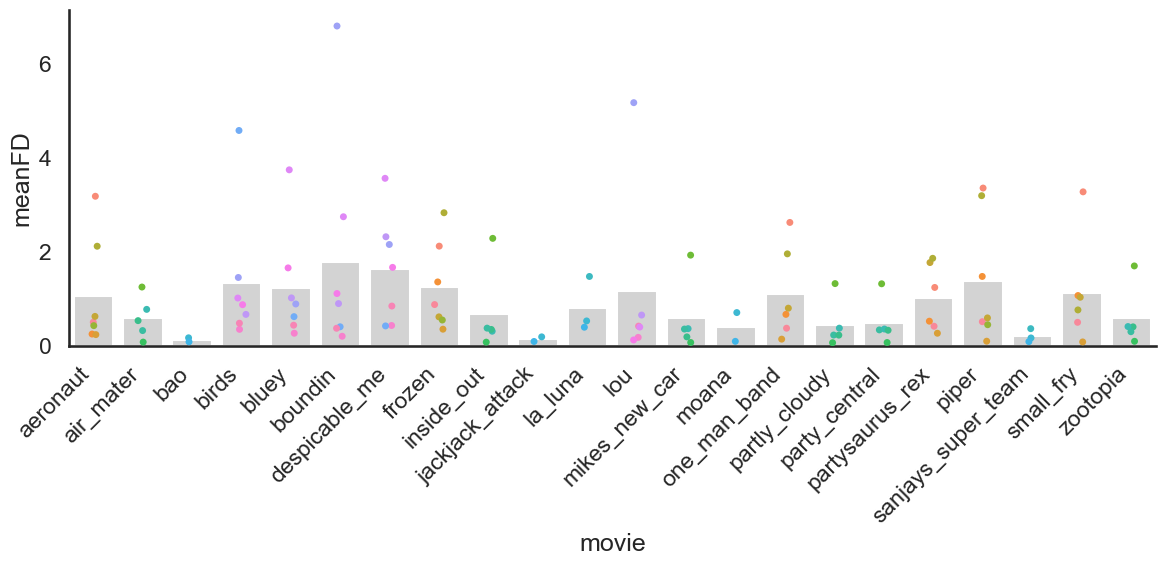

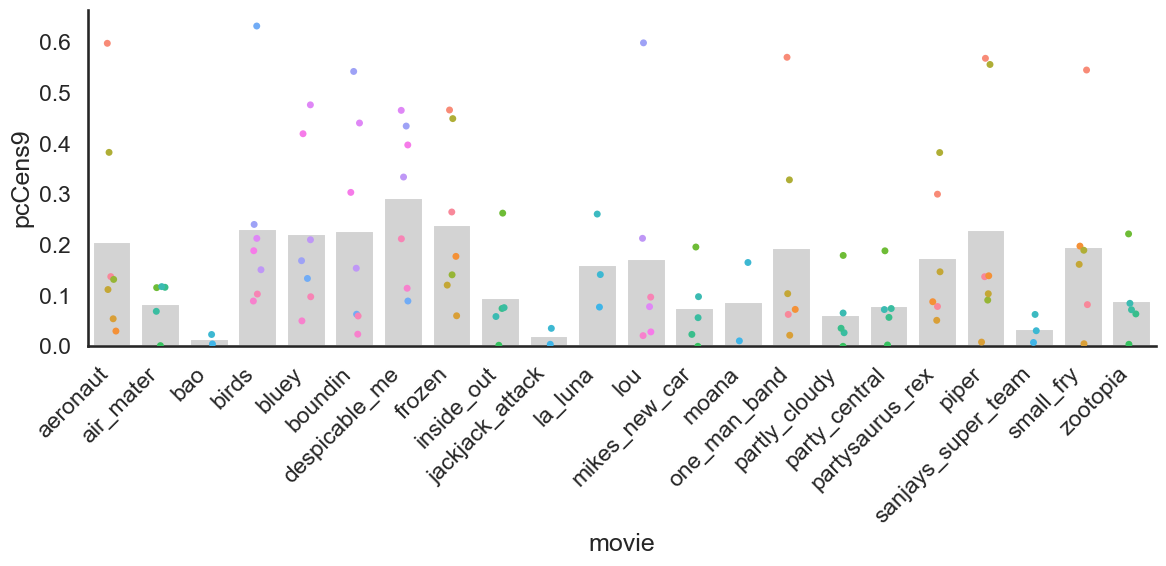

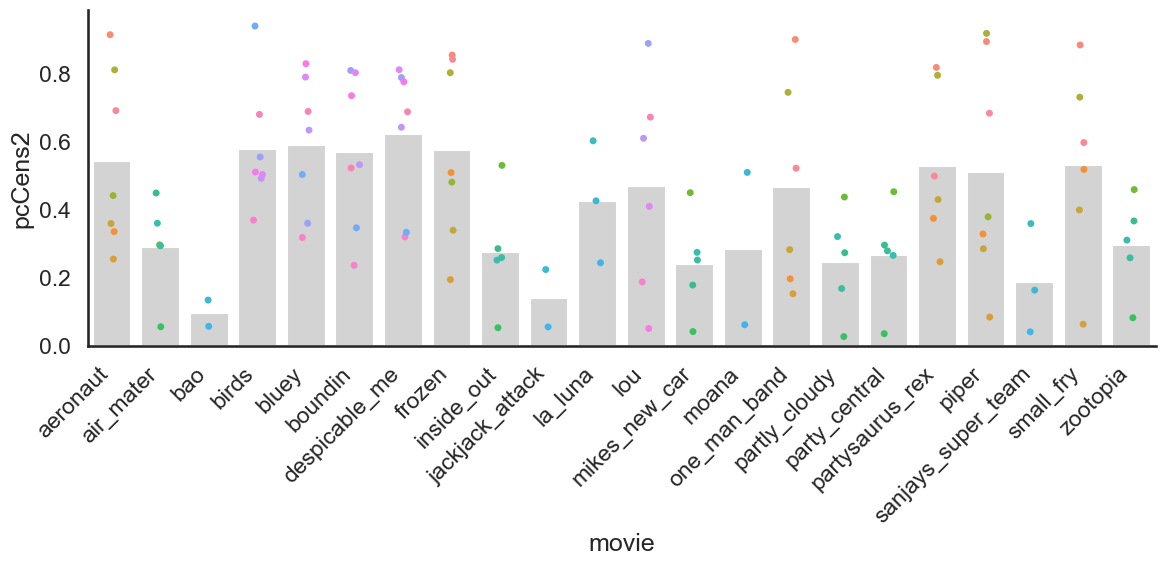

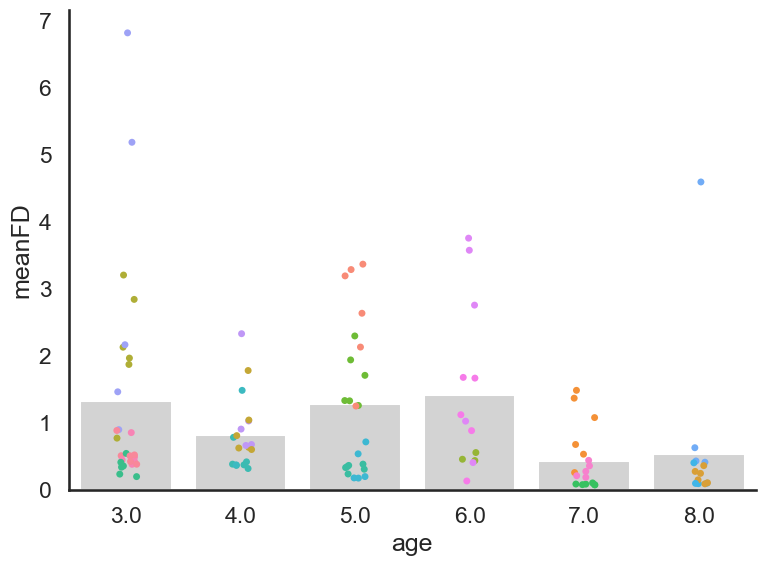

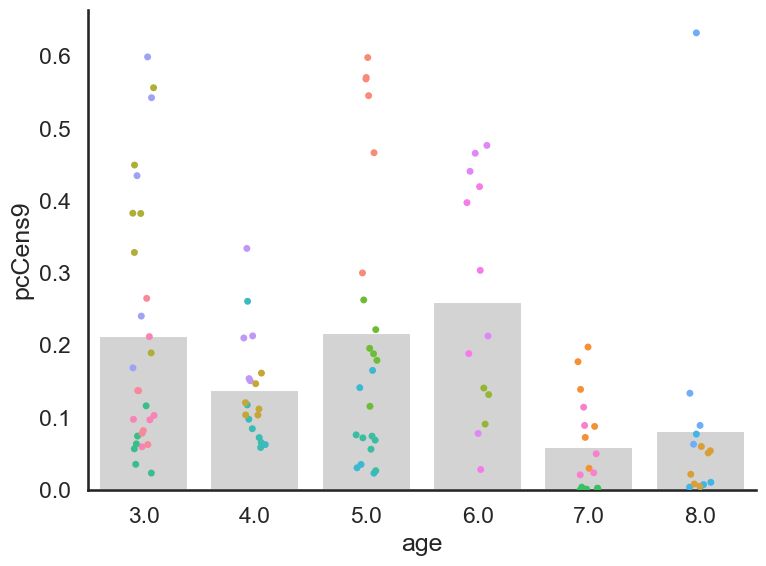

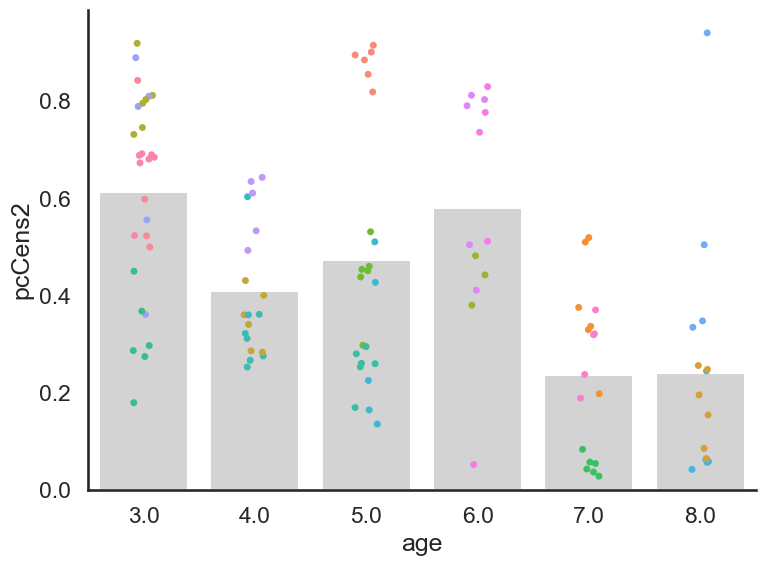

In [3]:
# plot mean FD

for v in ['meanFD','pcCens9','pcCens2']:

    plt.figure(figsize=(12,6))
    sns.barplot(y=v,x='movie', data=data, color='lightgray',errwidth=0)
    sns.stripplot(y=v,x='movie', data=data, hue='sub')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_clip_motion_{0}_plot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

for v in ['meanFD','pcCens9','pcCens2']:

    plt.figure(figsize=(8,6))
    sns.barplot(y=v, x='age', data=data, color='lightgray',errwidth=0)
    sns.stripplot(y=v, x='age', data=data, hue='sub')
    plt.legend().remove()
    sns.despine()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_age_motion_{0}_plot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

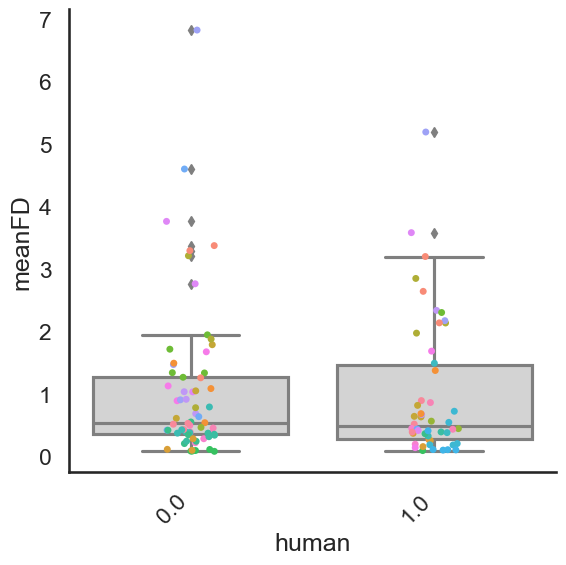

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: meanFD   
No. Observations: 115     Method:             REML     
No. Groups:       22      Scale:              0.6868   
Min. group size:  2       Log-Likelihood:     -161.9162
Max. group size:  6       Converged:          Yes      
Mean group size:  5.2                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.022    0.208  4.916 0.000  0.614  1.429
human        -0.013    0.173 -0.077 0.939 -0.353  0.326
sub Var       0.676    0.332                           



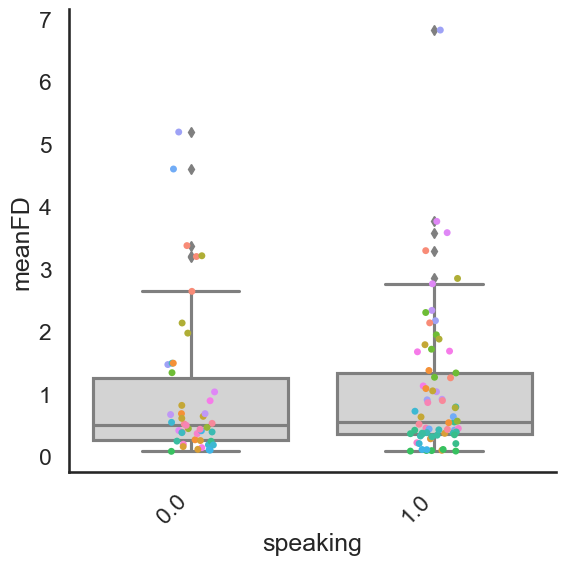

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: meanFD   
No. Observations: 115     Method:             REML     
No. Groups:       22      Scale:              0.6848   
Min. group size:  2       Log-Likelihood:     -161.8346
Max. group size:  6       Converged:          Yes      
Mean group size:  5.2                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  0.968     0.215  4.491  0.000   0.545   1.390
speaking   0.083     0.166  0.499  0.618  -0.243   0.408
sub Var    0.678     0.333                              



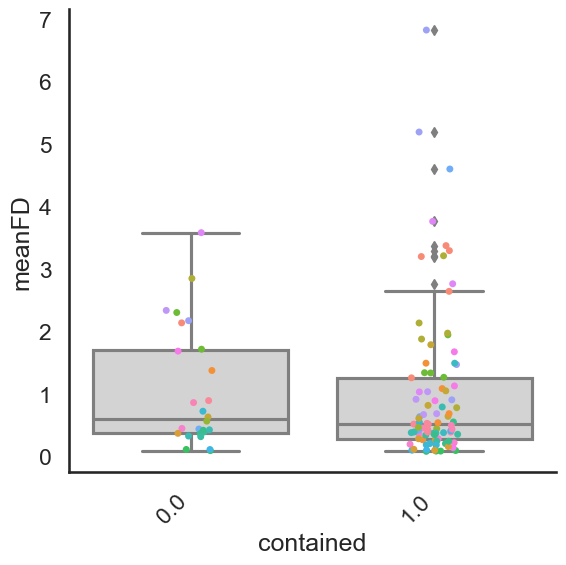

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: meanFD   
No. Observations: 115     Method:             REML     
No. Groups:       22      Scale:              0.6812   
Min. group size:  2       Log-Likelihood:     -161.5154
Max. group size:  6       Converged:          Yes      
Mean group size:  5.2                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.133    0.241  4.694 0.000  0.660  1.606
contained    -0.151    0.187 -0.808 0.419 -0.516  0.215
sub Var       0.682    0.335                           



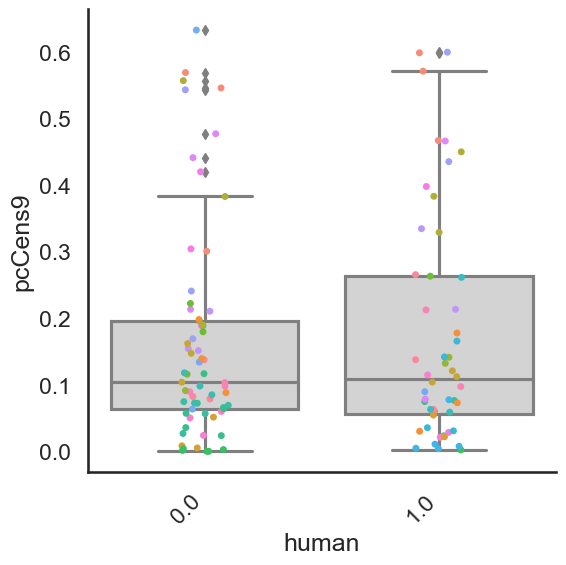

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pcCens9
No. Observations: 115     Method:             REML   
No. Groups:       22      Scale:              0.0096 
Min. group size:  2       Log-Likelihood:     74.0223
Max. group size:  6       Converged:          Yes    
Mean group size:  5.2                                
-----------------------------------------------------
             Coef. Std.Err.   z   P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept    0.162    0.031 5.256 0.000  0.101  0.222
human        0.014    0.021 0.656 0.512 -0.027  0.054
sub Var      0.017    0.065                          



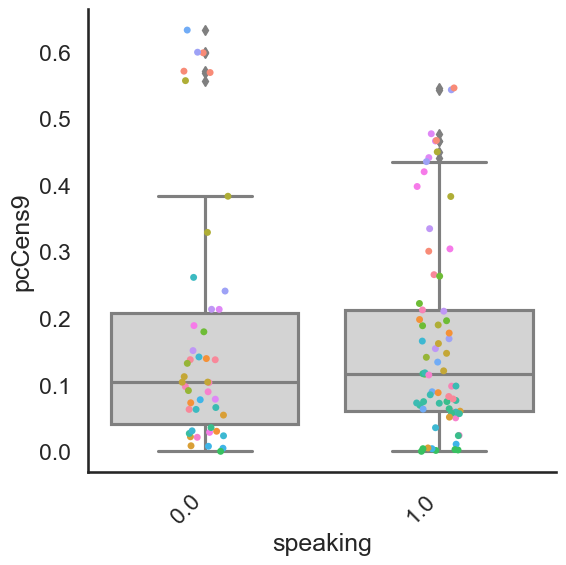

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pcCens9
No. Observations: 115     Method:             REML   
No. Groups:       22      Scale:              0.0096 
Min. group size:  2       Log-Likelihood:     74.0013
Max. group size:  6       Converged:          Yes    
Mean group size:  5.2                                
-----------------------------------------------------
             Coef. Std.Err.   z   P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept    0.160    0.031 5.085 0.000  0.098  0.222
speaking     0.014    0.020 0.691 0.489 -0.025  0.052
sub Var      0.017    0.065                          



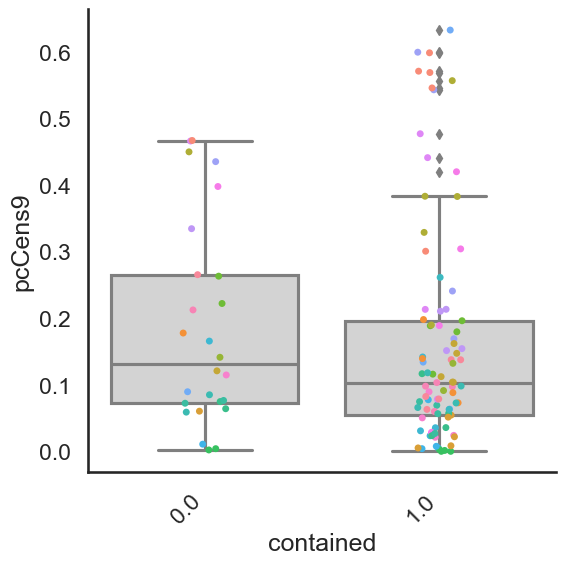

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pcCens9
No. Observations: 115     Method:             REML   
No. Groups:       22      Scale:              0.0092 
Min. group size:  2       Log-Likelihood:     75.8576
Max. group size:  6       Converged:          Yes    
Mean group size:  5.2                                
-----------------------------------------------------
           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept   0.202    0.034  5.947 0.000  0.135  0.269
contained  -0.044    0.022 -2.015 0.044 -0.086 -0.001
sub Var     0.017    0.067                           



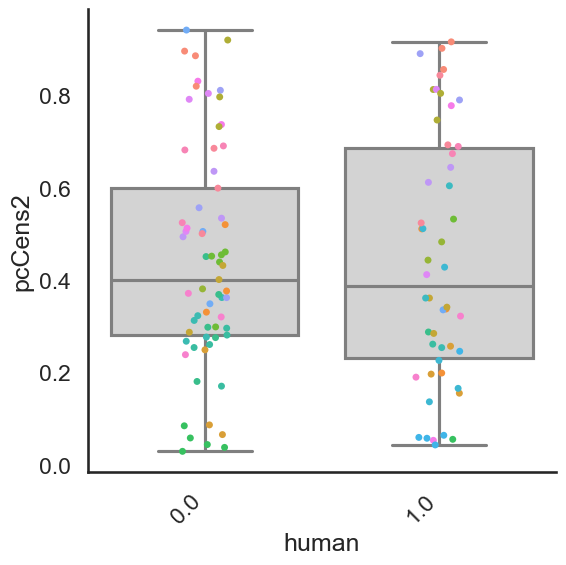

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pcCens2
No. Observations: 115     Method:             REML   
No. Groups:       22      Scale:              0.0168 
Min. group size:  2       Log-Likelihood:     38.1175
Max. group size:  6       Converged:          Yes    
Mean group size:  5.2                                
-----------------------------------------------------
           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept   0.449    0.050  9.078 0.000  0.352  0.546
human      -0.004    0.027 -0.134 0.894 -0.057  0.050
sub Var     0.047    0.132                           



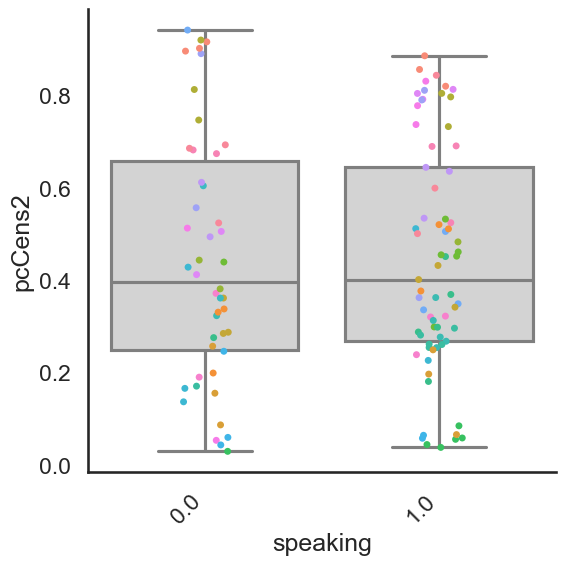

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pcCens2
No. Observations: 115     Method:             REML   
No. Groups:       22      Scale:              0.0163 
Min. group size:  2       Log-Likelihood:     39.3263
Max. group size:  6       Converged:          Yes    
Mean group size:  5.2                                
-----------------------------------------------------
             Coef. Std.Err.   z   P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept    0.424    0.050 8.400 0.000  0.325  0.523
speaking     0.041    0.026 1.604 0.109 -0.009  0.092
sub Var      0.048    0.136                          



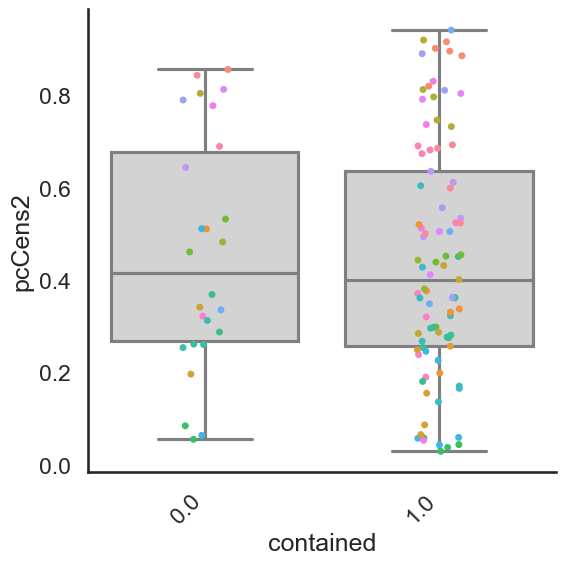

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pcCens2
No. Observations: 115     Method:             REML   
No. Groups:       22      Scale:              0.0161 
Min. group size:  2       Log-Likelihood:     39.9792
Max. group size:  6       Converged:          Yes    
Mean group size:  5.2                                
-----------------------------------------------------
           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept   0.491    0.053  9.235 0.000  0.387  0.595
contained  -0.055    0.029 -1.922 0.055 -0.111  0.001
sub Var     0.048    0.137                           



In [22]:
for v in ['meanFD','pcCens9','pcCens2']:
    for f in ['human','speaking','contained']:

        plt.figure(figsize=(6,6))
        sns.boxplot(y=v,x=f, data=data, color='lightgray')
        sns.stripplot(y=v,x=f, data=data, hue='sub')
        plt.xticks(rotation=45, ha='right')
        sns.despine()
        plt.legend().remove()
        plt.tight_layout()
        plt.savefig(os.path.join(figs_dir, 'fullsample_feature_{0}_motion_{1}_plot.png'.format(f,v)), dpi=200)
        plt.show()
        plt.close()
        
        temp = data.dropna().copy()
        res = smf.mixedlm('{0} ~ {1}'.format(v,f), groups='sub', data=temp).fit()
        print(res.summary())

# Plots by age group

## 3-4 year olds (only 1 without sound so far)

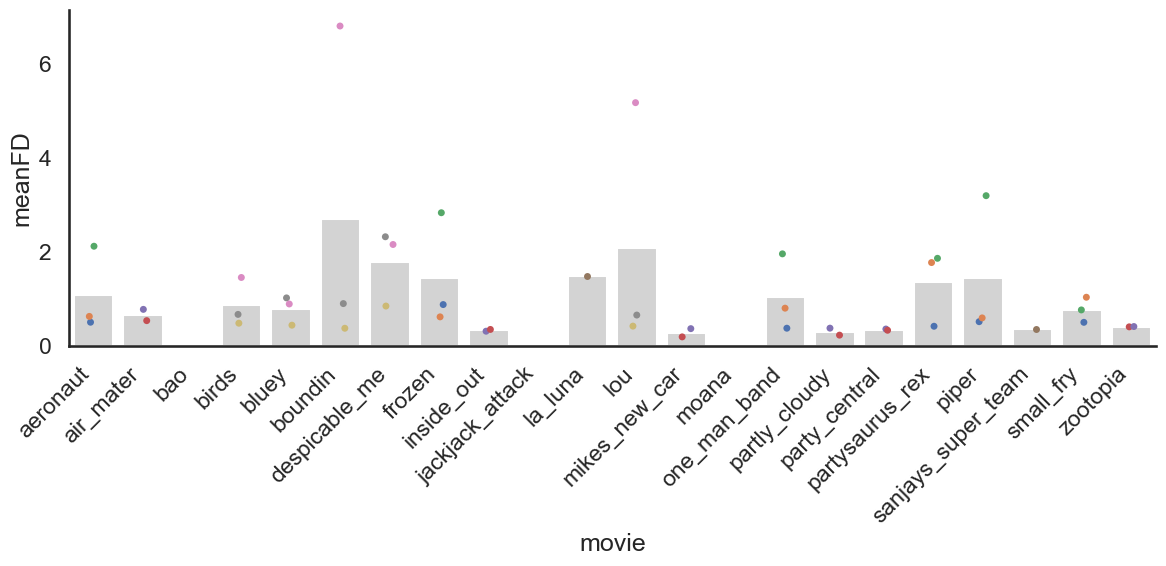

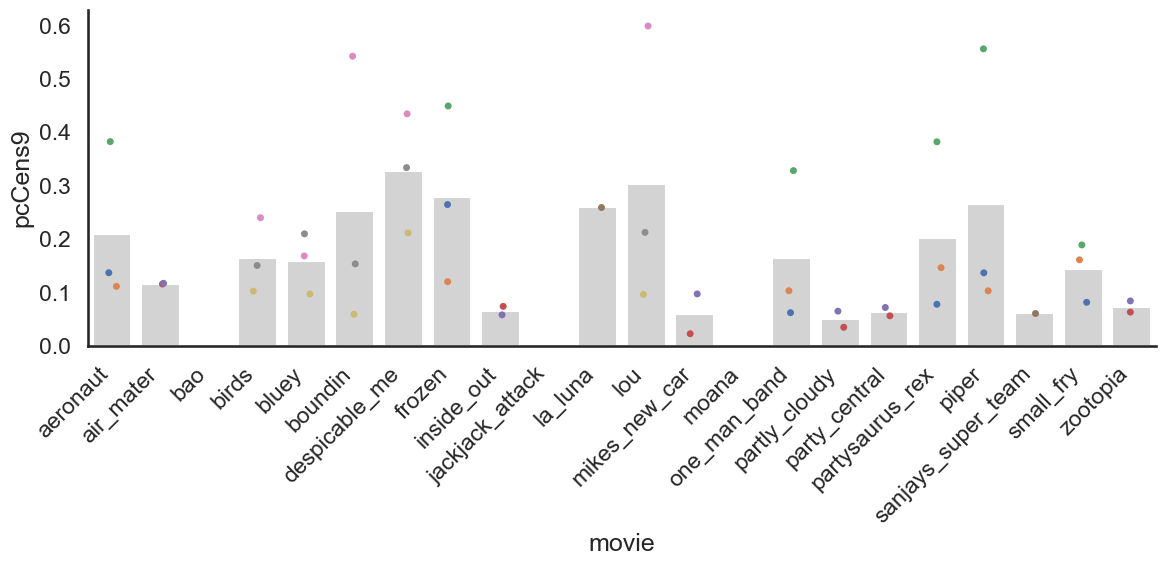

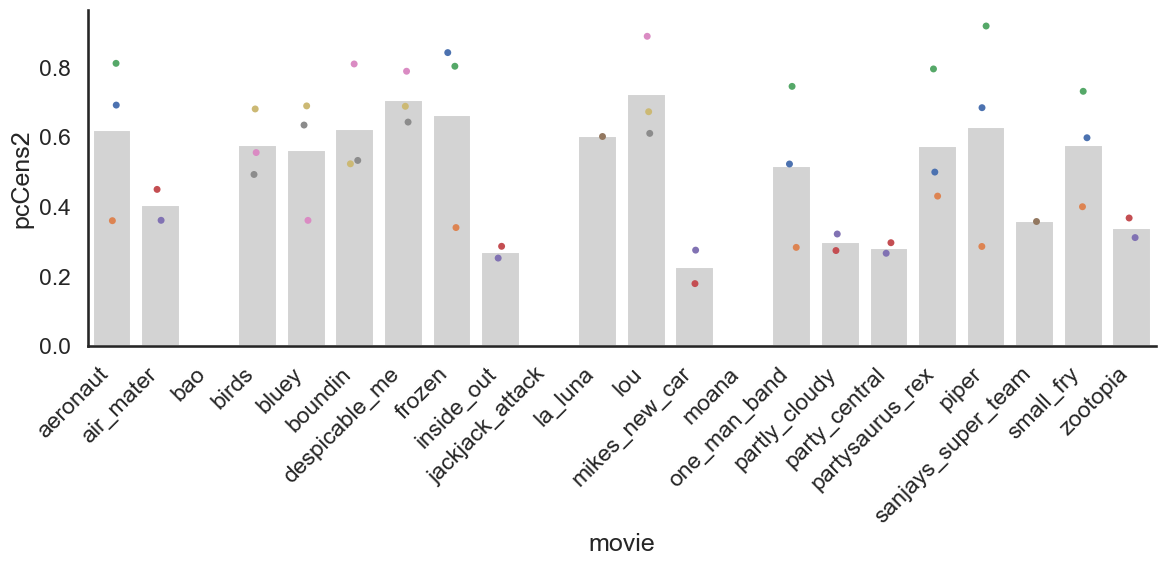

In [4]:
tempdata = data.loc[data['age']<5,:].copy()

# plot mean FD

for v in ['meanFD','pcCens9','pcCens2']:

    plt.figure(figsize=(12,6))
    sns.barplot(y=v,x='movie', data=tempdata, color='lightgray',errwidth=0)
    sns.stripplot(y=v,x='movie', data=tempdata, hue='sub')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'ages34_clip_motion_{0}_plot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

## 5-6 year olds

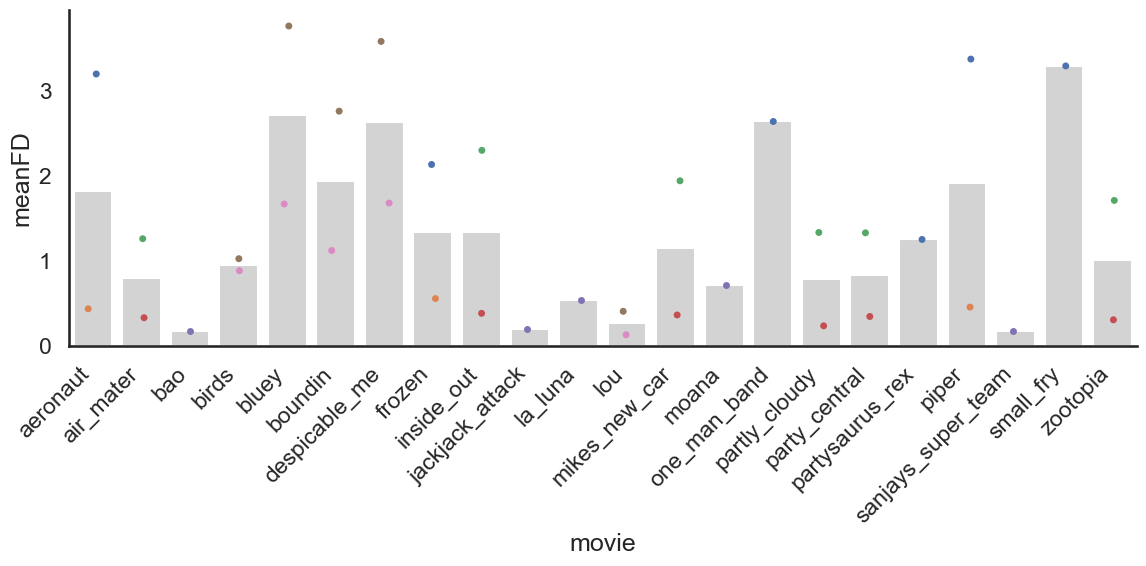

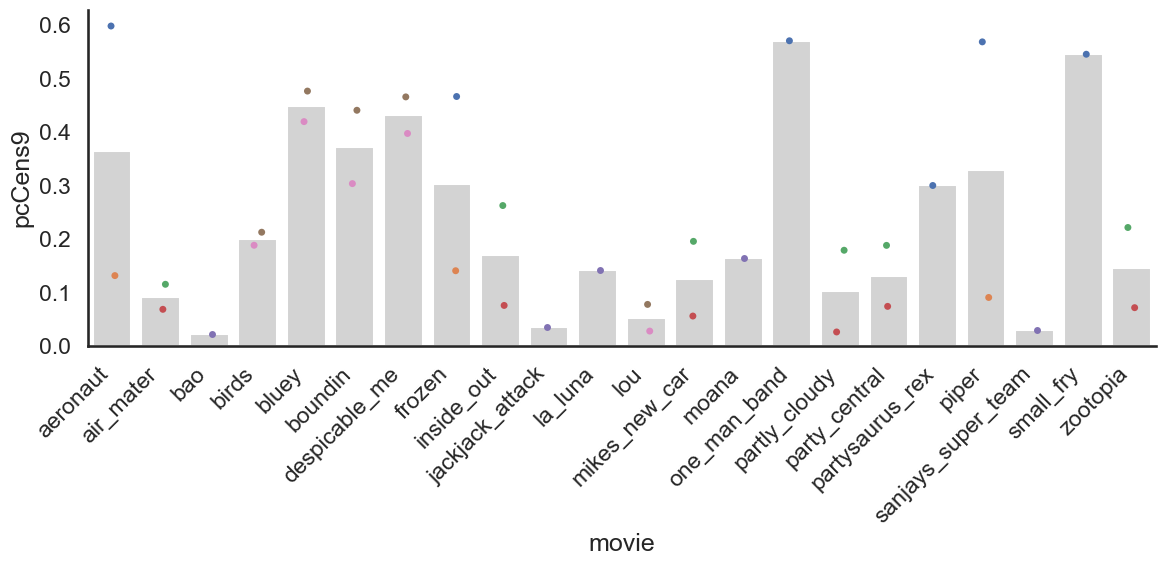

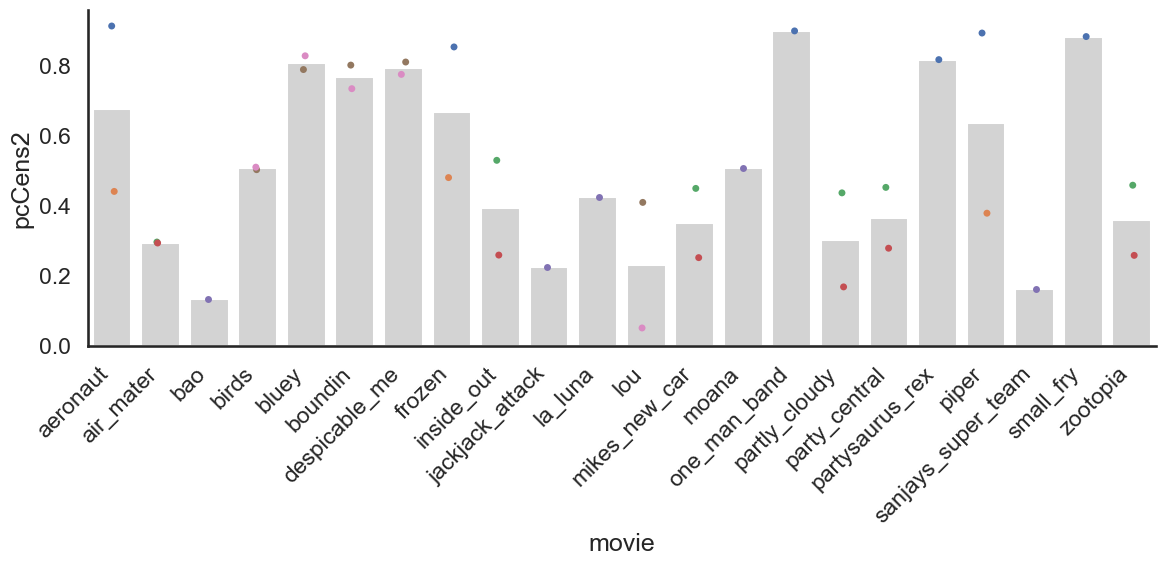

In [5]:
tempdata = data.loc[(data['age']==5) | (data['age']==6),:].copy()

# plot mean FD

for v in ['meanFD','pcCens9','pcCens2']:

    plt.figure(figsize=(12,6))
    sns.barplot(y=v,x='movie', data=tempdata, color='lightgray',errwidth=0)
    sns.stripplot(y=v,x='movie', data=tempdata, hue='sub')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'ages56_clip_motion_{0}_plot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

## 7-8 year olds

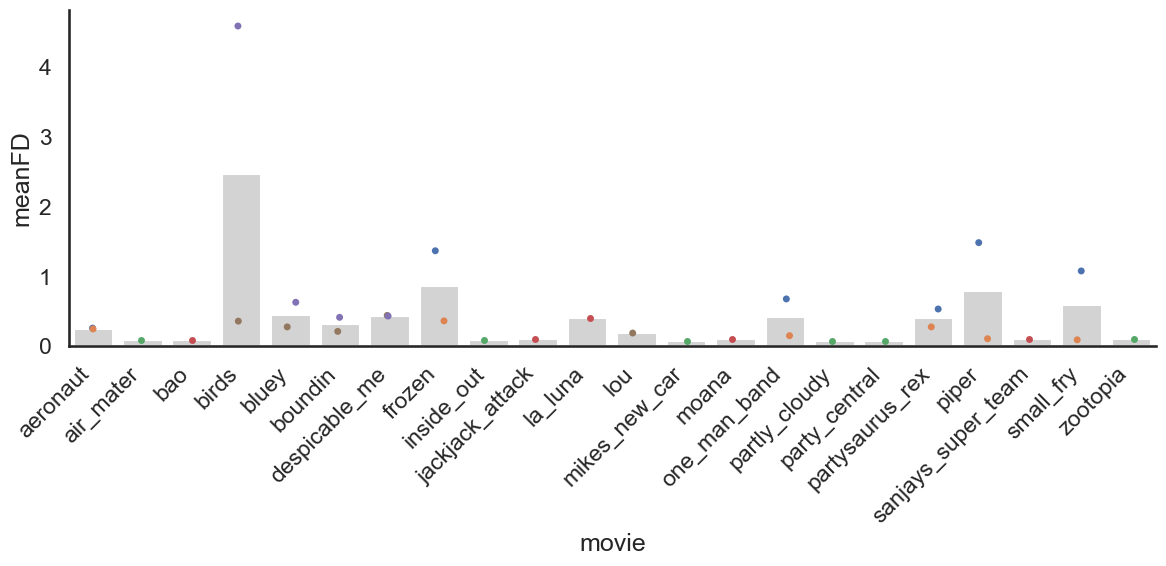

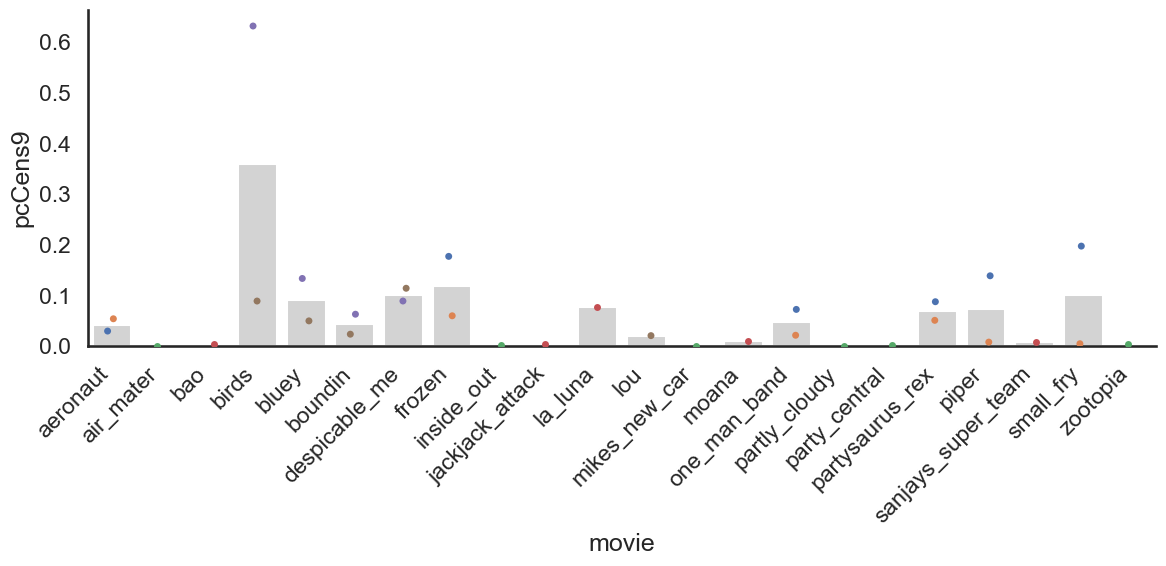

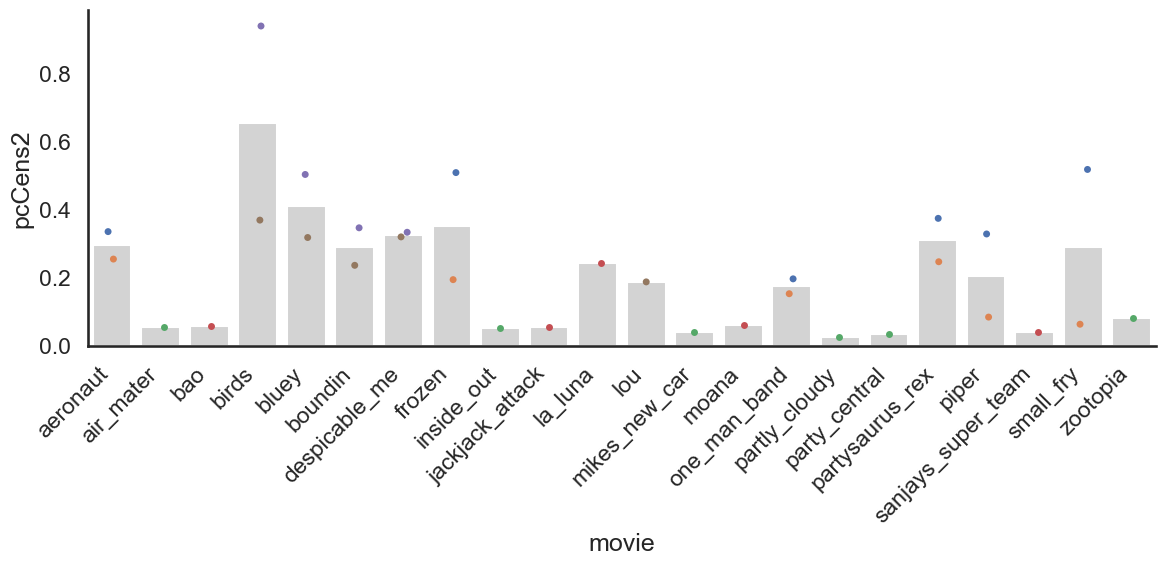

In [6]:
tempdata = data.loc[(data['age']==7) | (data['age']==8),:].copy()

# plot mean FD

for v in ['meanFD','pcCens9','pcCens2']:

    plt.figure(figsize=(12,6))
    sns.barplot(y=v,x='movie', data=tempdata, color='lightgray',errwidth=0)
    sns.stripplot(y=v,x='movie', data=tempdata, hue='sub')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'ages78_clip_motion_{0}_plot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

# get timeseries of motion across clips

In [59]:
clipmotion = {}
for mov in clipinfo.index:
    clipmotion[mov] = pd.DataFrame(index=range(0,3001))

In [62]:
for sub in subs:
    subdata = pd.read_csv(os.path.join(data_dir, sub, '{0}_motion_data_processed.csv'.format(sub)), index_col=0)
    clips = np.unique(subdata['title'].dropna())
    for clip in clips:
        temp = subdata.loc[subdata['title']==clip,'FD50'].to_numpy()
        clipmotion[clip].loc[:temp.shape[0]-1,sub] = temp
        

In [65]:
for mov in clipinfo.index:
    clipmotion[mov] = clipmotion[mov].dropna(axis=0,how='all')

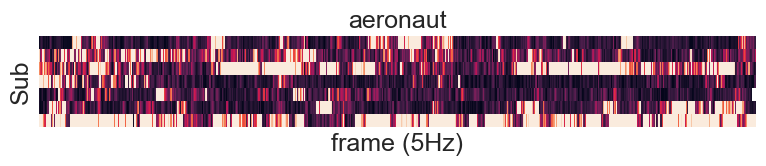

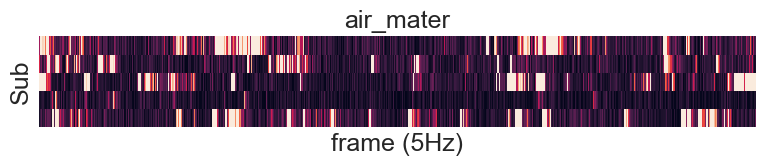

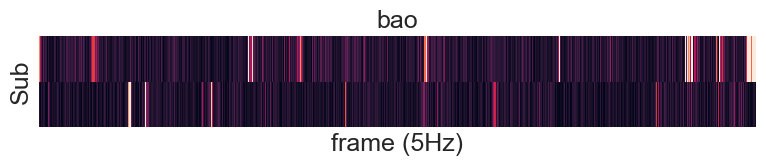

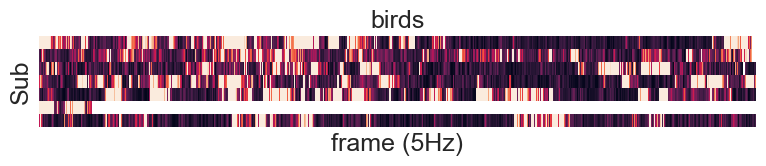

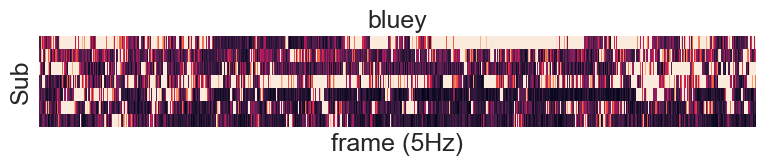

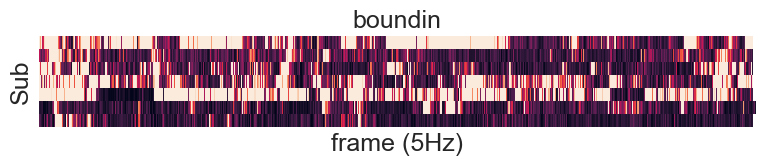

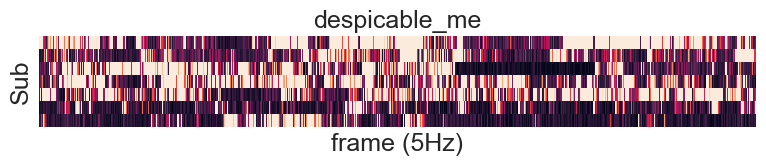

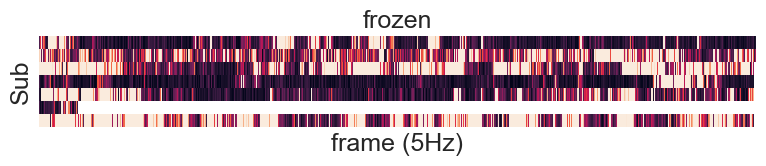

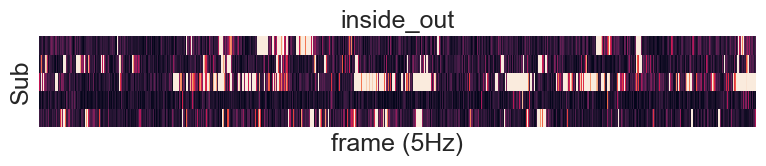

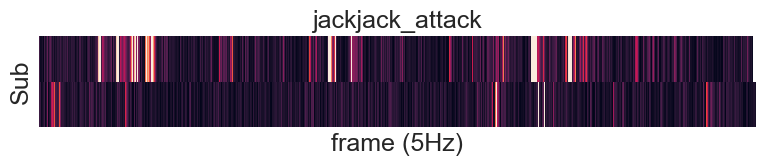

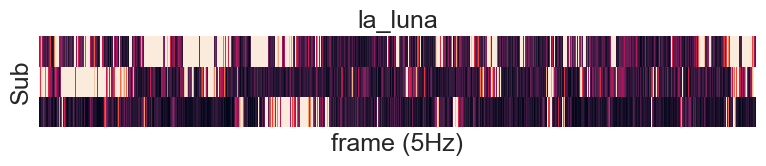

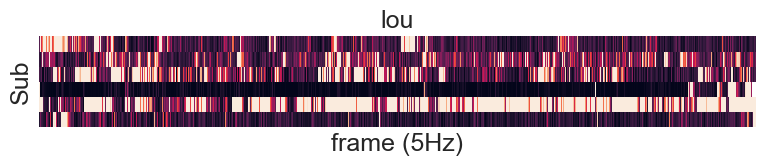

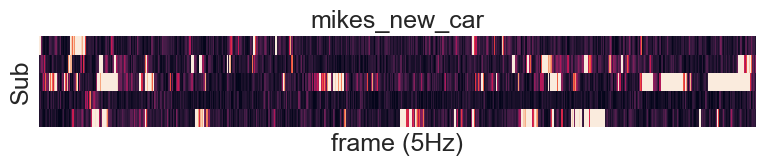

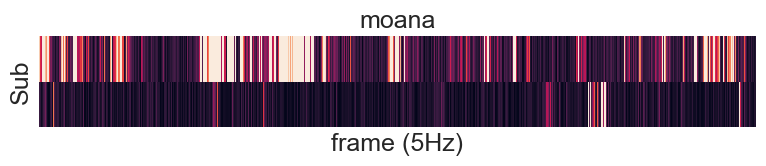

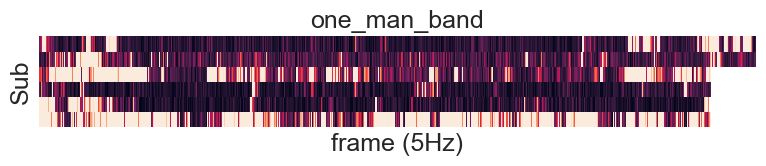

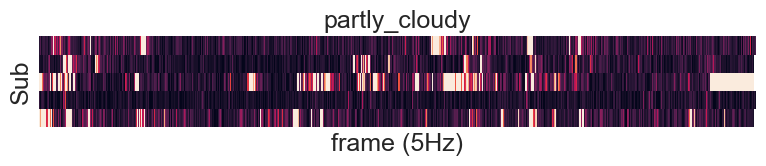

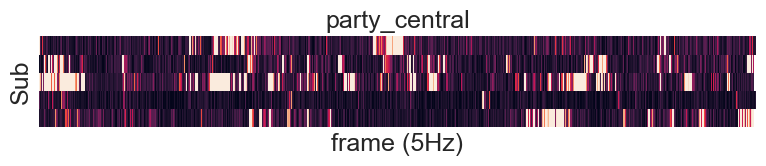

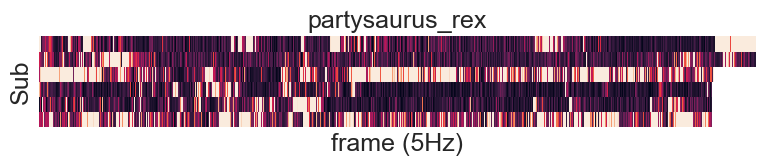

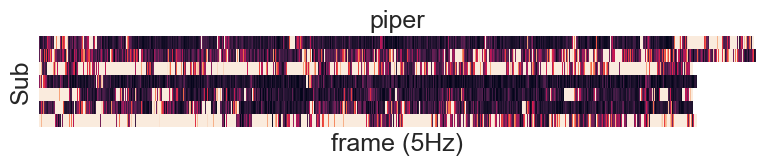

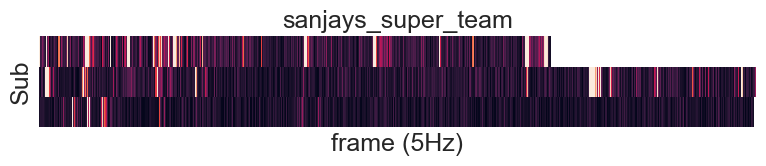

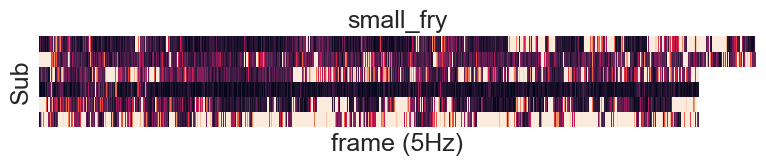

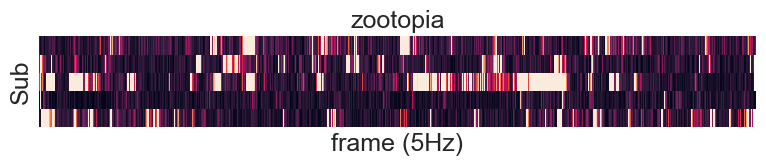

In [83]:
for mov in clipinfo.index:
    plt.figure(figsize=(8,2))
    sns.heatmap(clipmotion[mov].T, vmax=1, cbar=False)   
    plt.xticks([])
    plt.ylabel('Sub')
    plt.xlabel('frame (5Hz)')
    plt.yticks([])
    plt.title(mov)
    
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_clip_{0}_motion_FD_timeplot.png'.format(mov)), dpi=200)
    plt.show()
    plt.close()

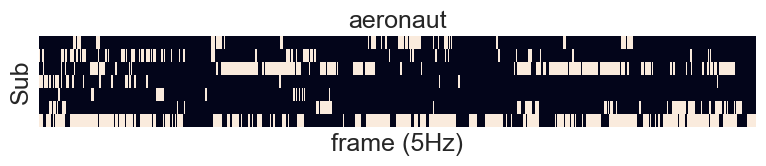

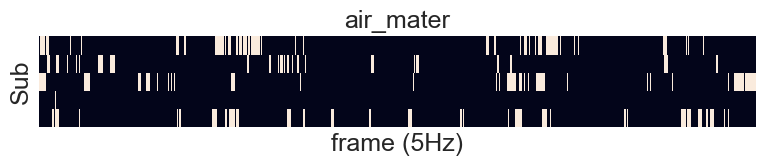

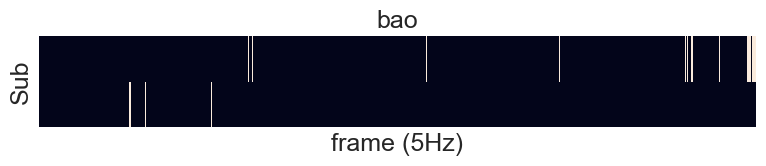

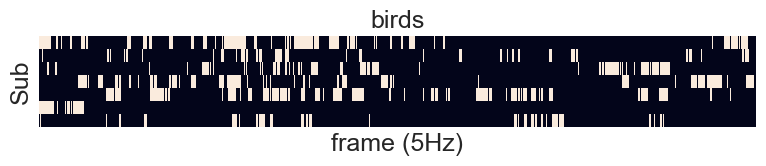

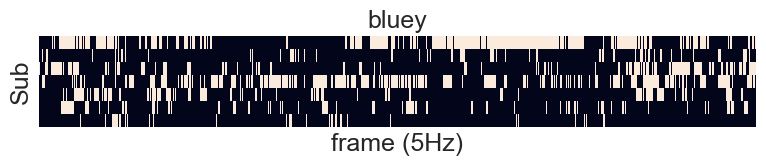

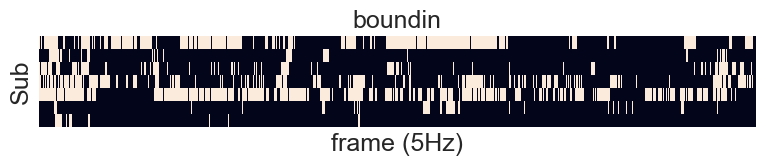

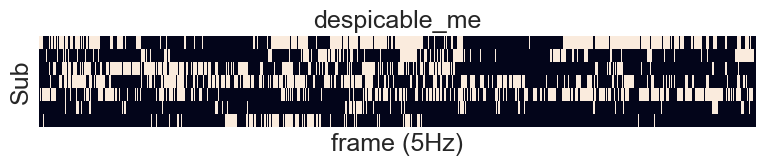

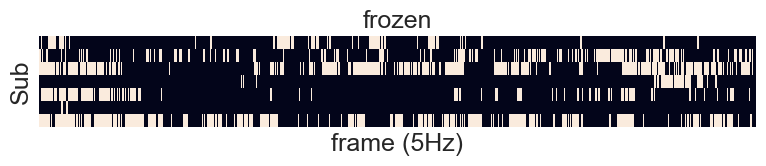

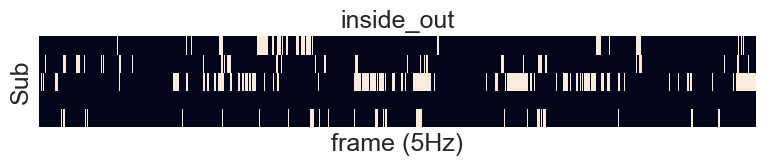

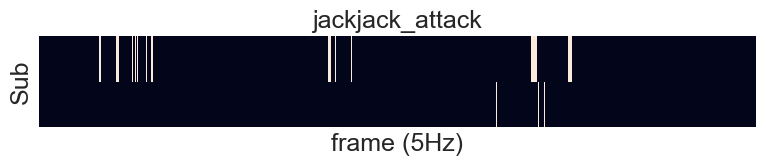

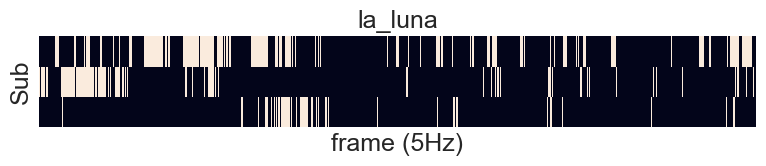

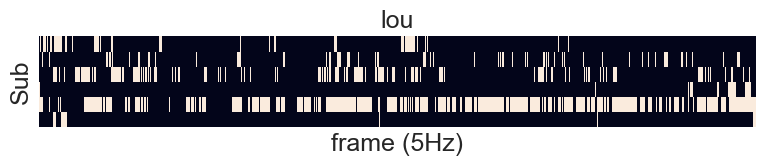

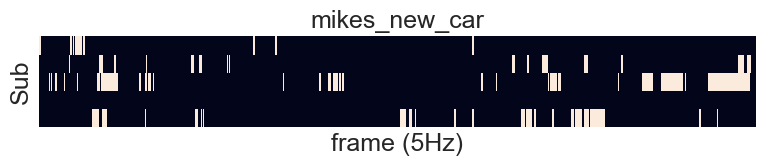

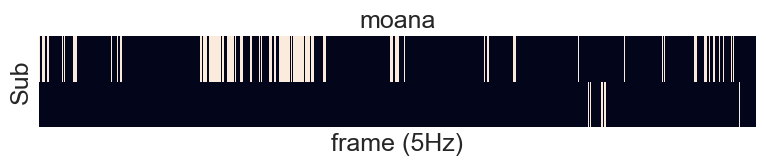

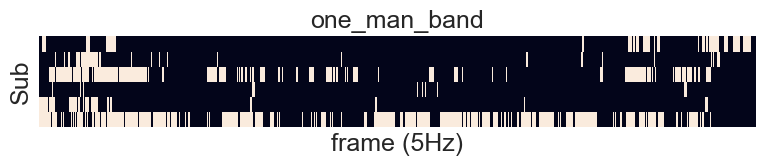

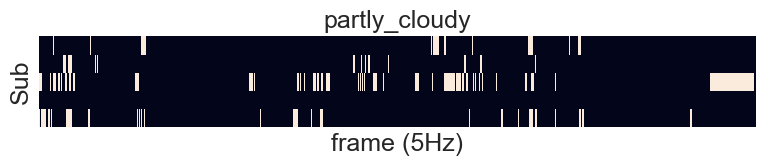

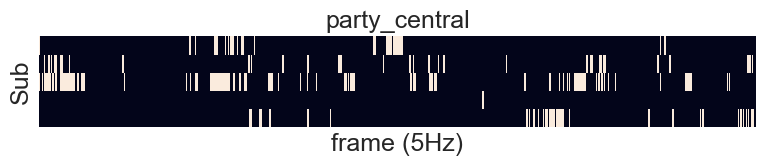

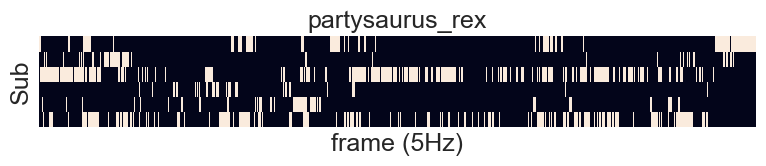

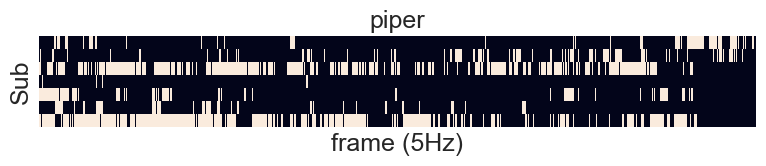

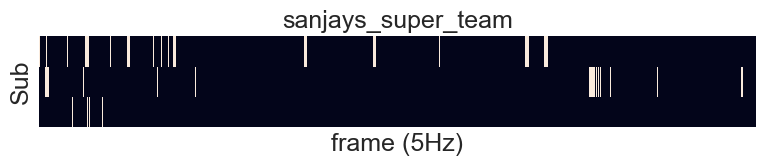

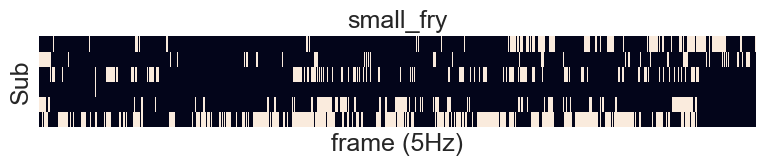

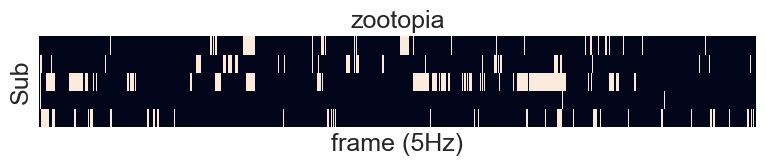

In [84]:
for mov in clipinfo.index:
    plt.figure(figsize=(8,2))
    sns.heatmap(clipmotion[mov].T>0.9, vmax=1, cbar=False)   
    plt.xticks([])
    plt.ylabel('Sub')
    plt.xlabel('frame (5Hz)')
    plt.yticks([])
    plt.title(mov)
    
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_clip_{0}_motion_cens09_timeplot.png'.format(mov)), dpi=200)
    plt.show()
    plt.close()

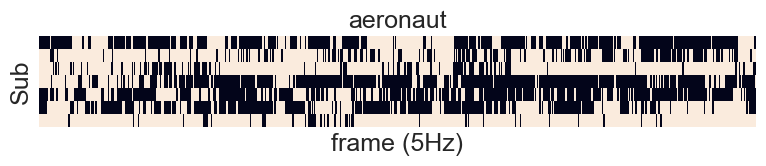

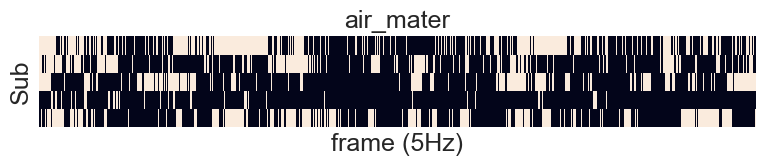

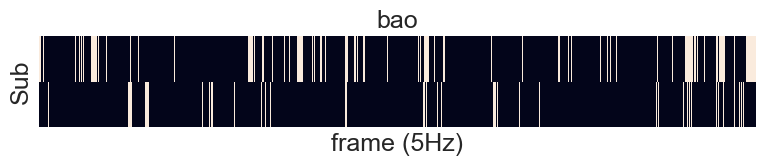

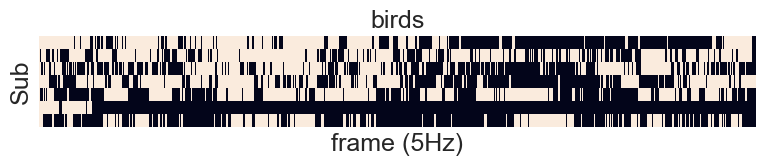

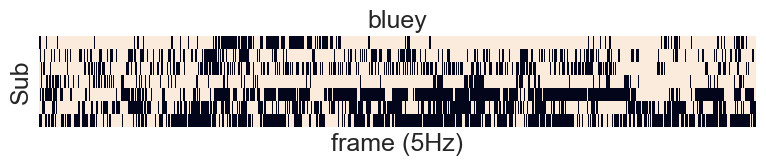

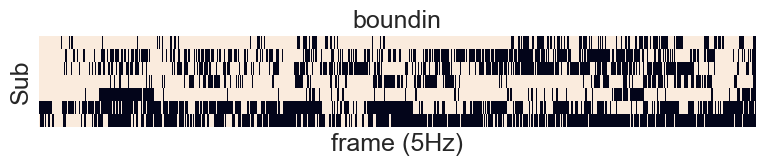

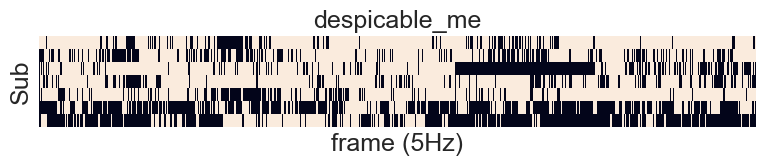

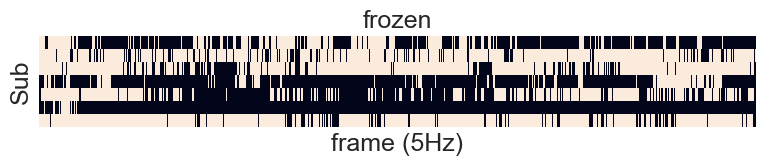

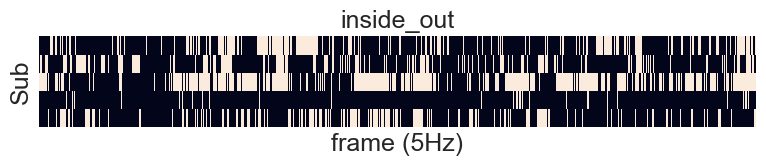

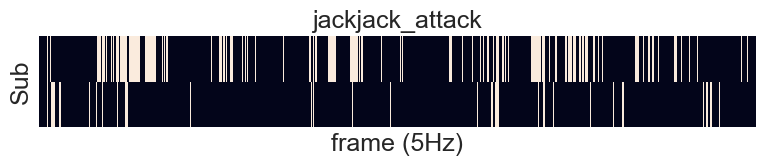

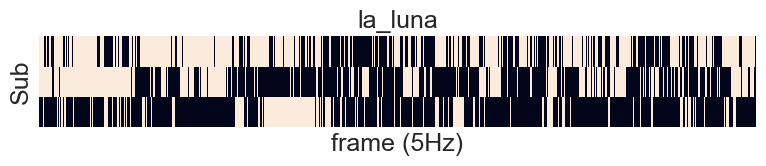

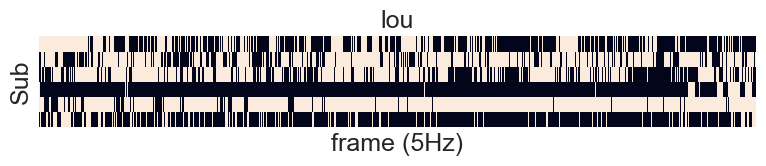

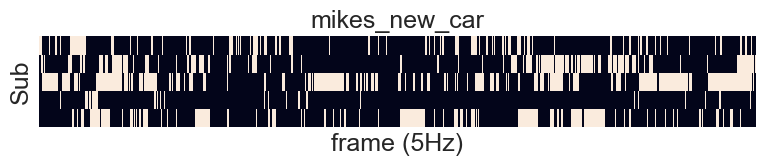

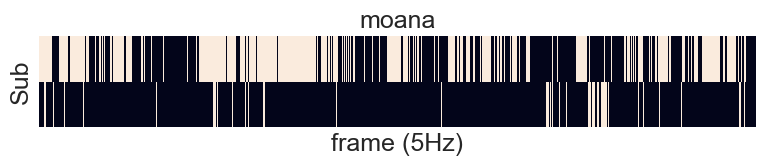

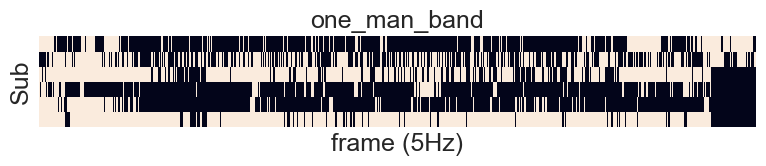

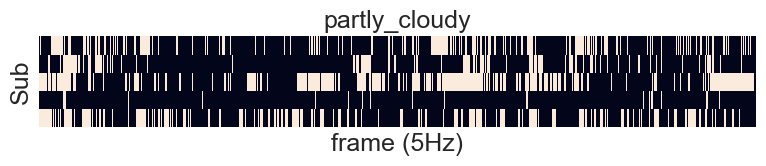

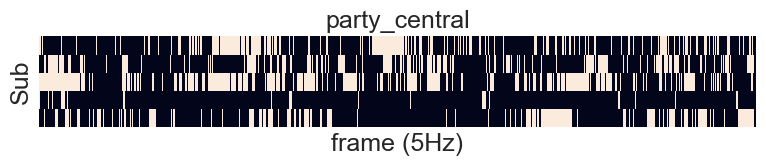

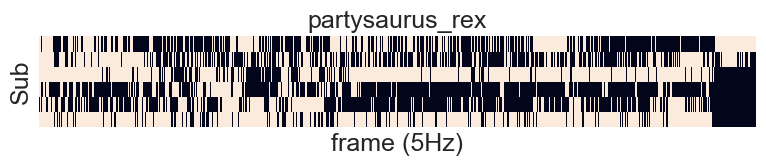

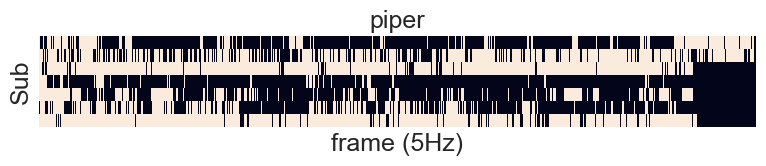

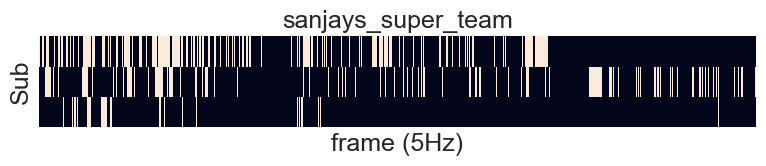

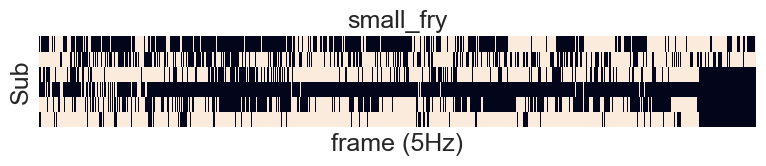

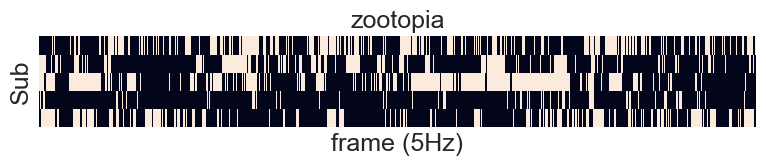

In [85]:
for mov in clipinfo.index:
    plt.figure(figsize=(8,2))
    sns.heatmap(clipmotion[mov].T>0.2, vmax=1, cbar=False)   
    plt.xticks([])
    plt.ylabel('Sub')
    plt.xlabel('frame (5Hz)')
    plt.yticks([])
    plt.title(mov)
    
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_clip_{0}_motion_cens02_timeplot.png'.format(mov)), dpi=200)
    plt.show()
    plt.close()

# examine ratings

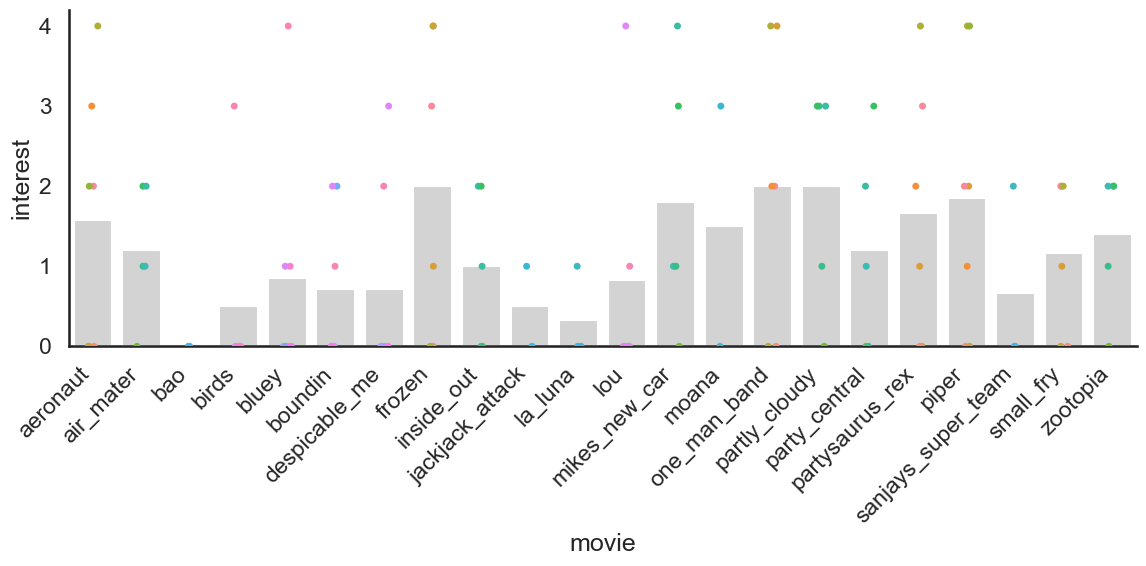

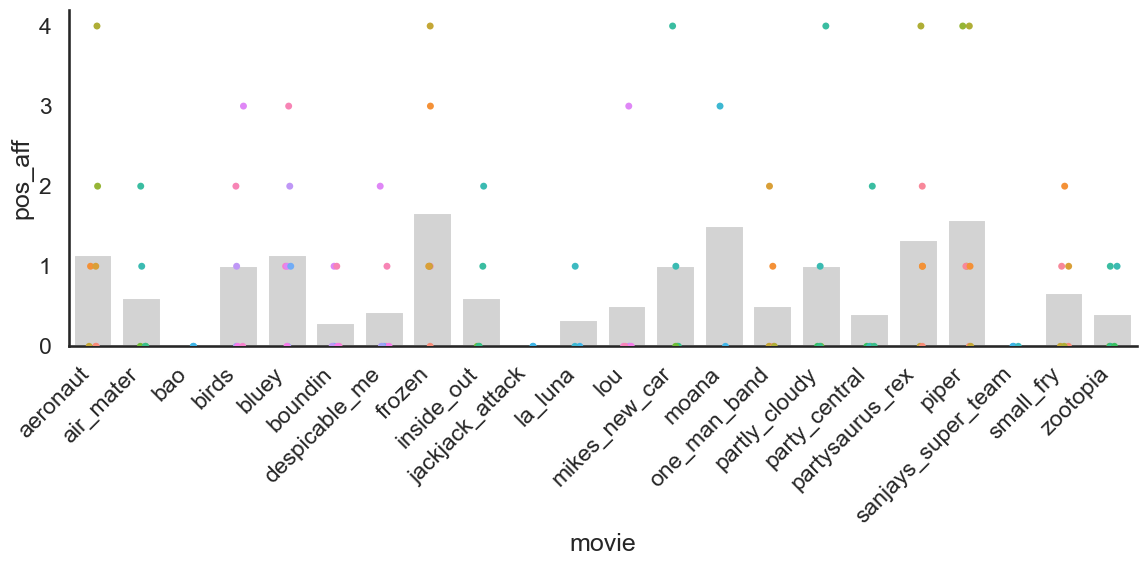

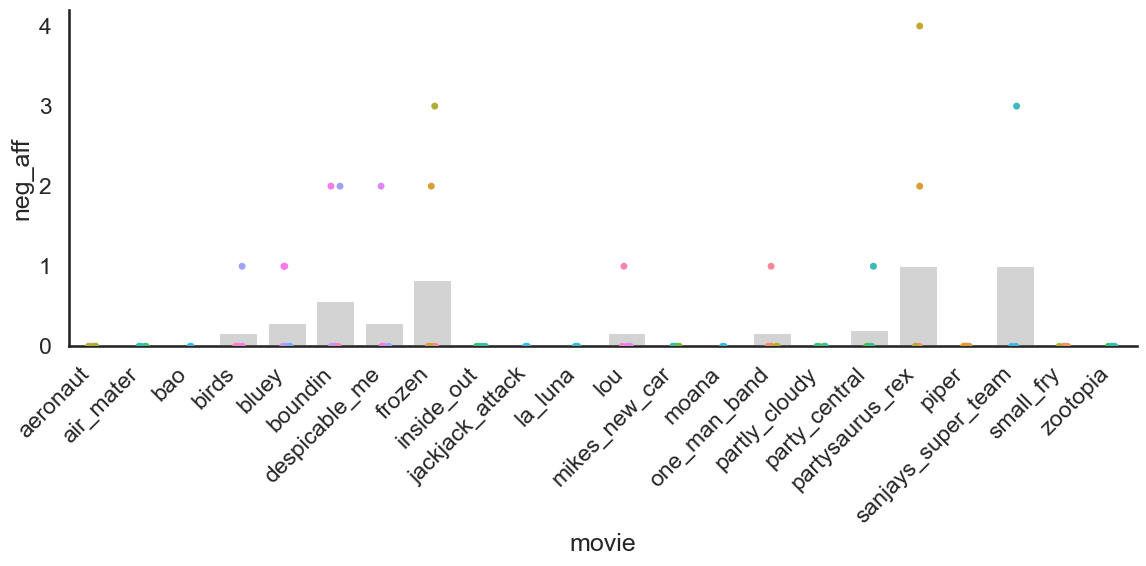

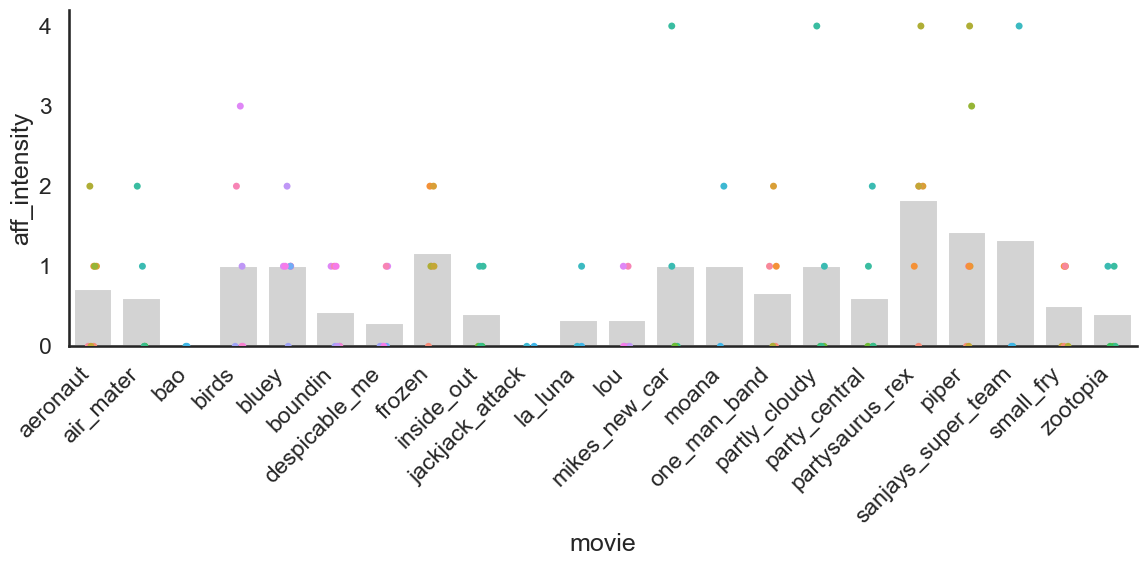

In [93]:
for v in ['interest', 'pos_aff', 'neg_aff','aff_intensity']:

    plt.figure(figsize=(12,6))
    sns.barplot(y=v,x='movie', data=data, color='lightgray',errwidth=0)
    sns.stripplot(y=v,x='movie', data=data, hue='sub')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_clip_affect_{0}_plot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

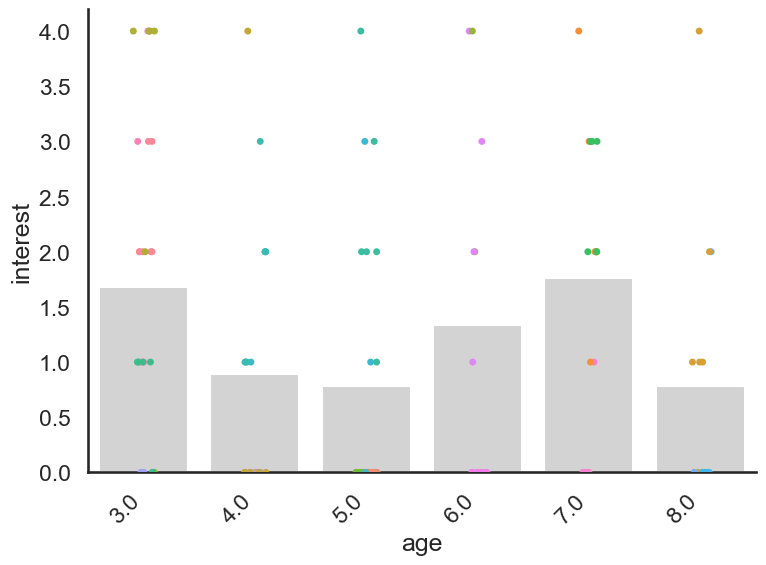

No handles with labels found to put in legend.


<Figure size 800x600 with 0 Axes>

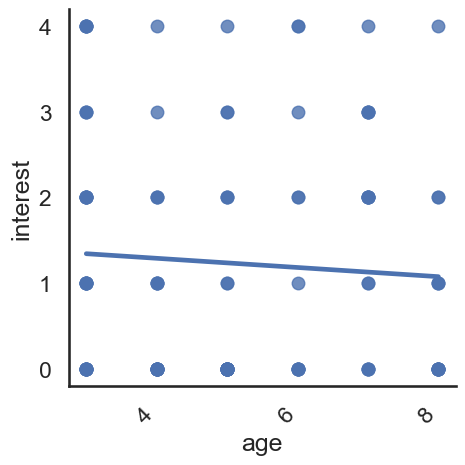

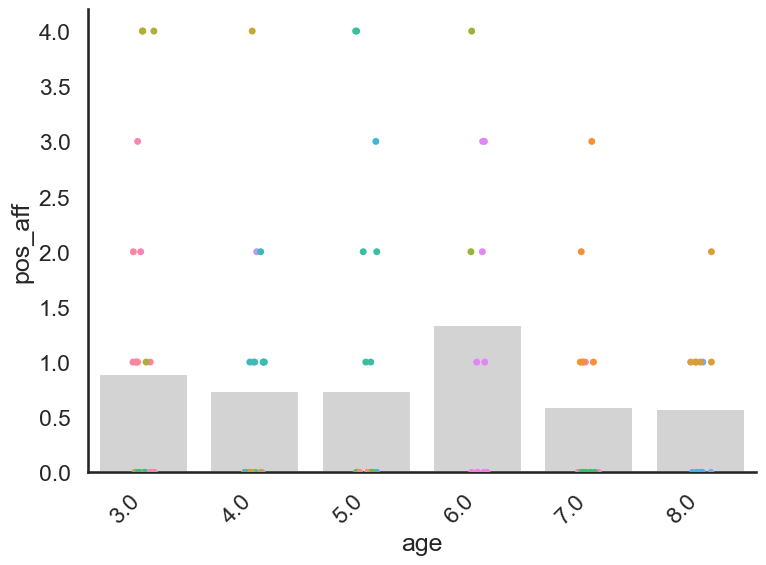

No handles with labels found to put in legend.


<Figure size 800x600 with 0 Axes>

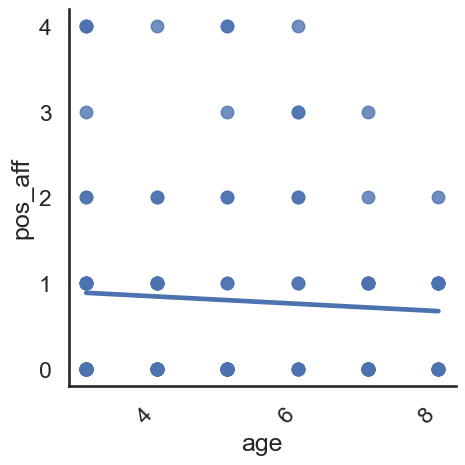

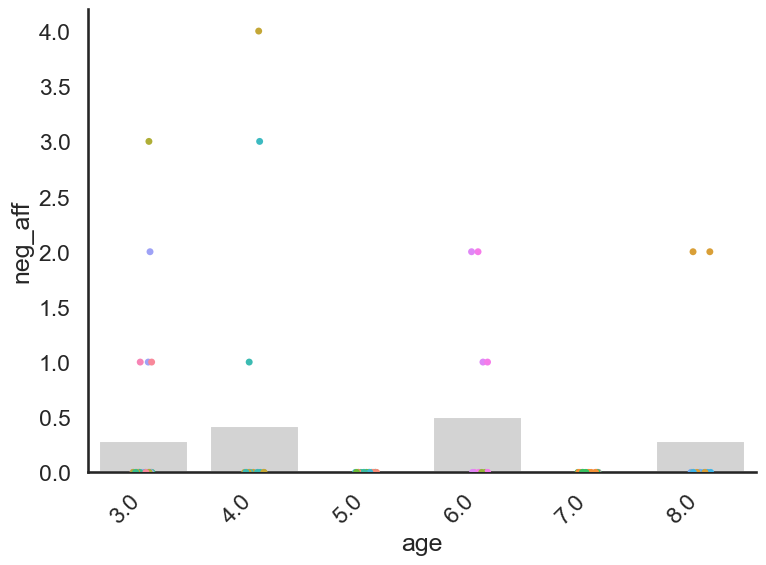

No handles with labels found to put in legend.


<Figure size 800x600 with 0 Axes>

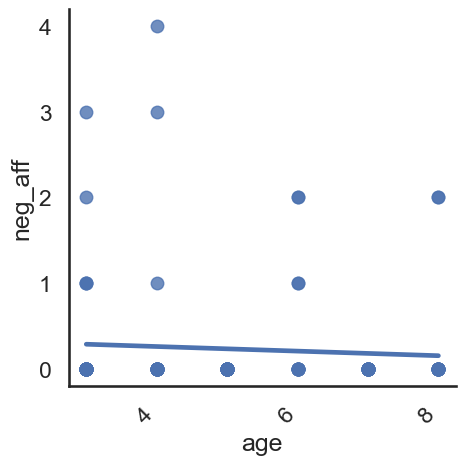

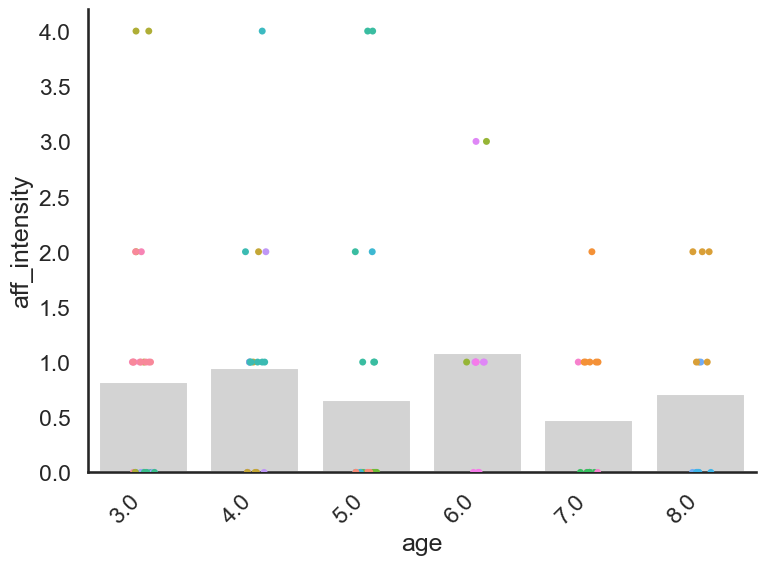

No handles with labels found to put in legend.


<Figure size 800x600 with 0 Axes>

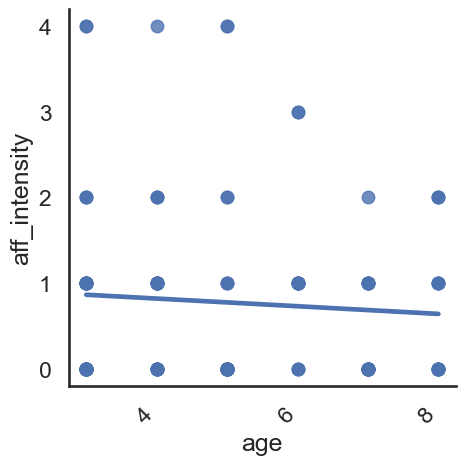

In [103]:
for v in ['interest', 'pos_aff', 'neg_aff','aff_intensity']:

    plt.figure(figsize=(8,6))
    sns.barplot(y=v,x='age', data=data, color='lightgray',errwidth=0)
    sns.stripplot(y=v,x='age', data=data, hue='sub')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_age_affect_{0}_plot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()
    
    plt.figure(figsize=(8,6))
    sns.lmplot(y=v,x='age', data=data, scatter=True, ci=None)
    #sns.stripplot(y=v,x='age', data=data, hue='sub')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_age_affect_{0}_lineplot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

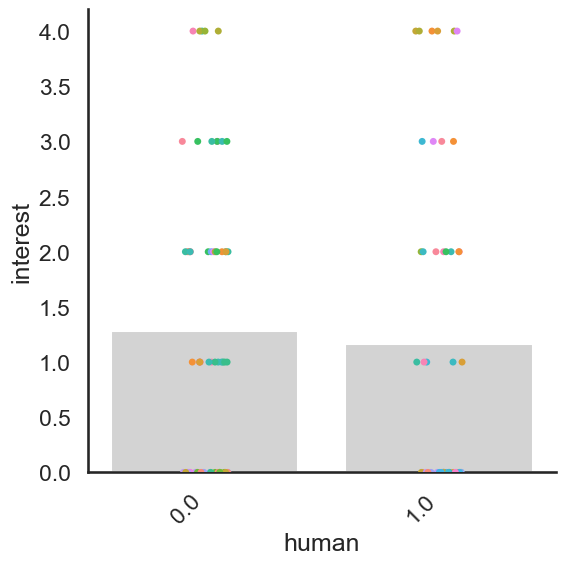

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: interest 
No. Observations: 113     Method:             REML     
No. Groups:       22      Scale:              0.9387   
Min. group size:  2       Log-Likelihood:     -177.0095
Max. group size:  6       Converged:          Yes      
Mean group size:  5.1                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  1.226     0.249  4.931  0.000   0.739   1.714
human      0.014     0.204  0.068  0.945  -0.386   0.414
sub Var    0.977     0.414                              



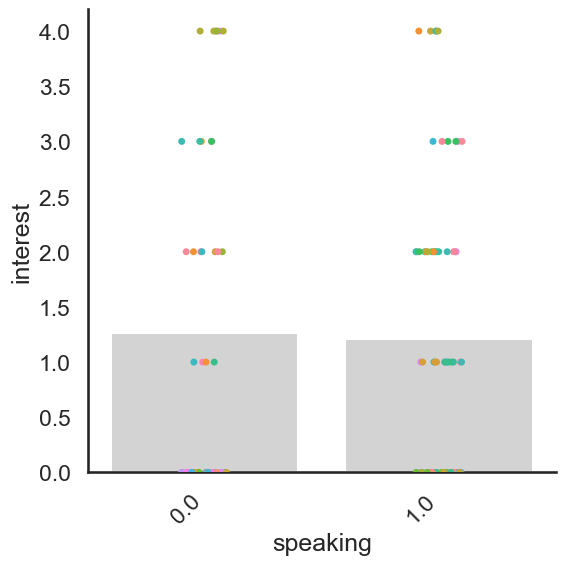

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: interest 
No. Observations: 113     Method:             REML     
No. Groups:       22      Scale:              0.9391   
Min. group size:  2       Log-Likelihood:     -177.0200
Max. group size:  6       Converged:          Yes      
Mean group size:  5.1                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.253    0.258  4.856 0.000  0.747  1.759
speaking     -0.035    0.199 -0.176 0.860 -0.426  0.355
sub Var       0.973    0.412                           



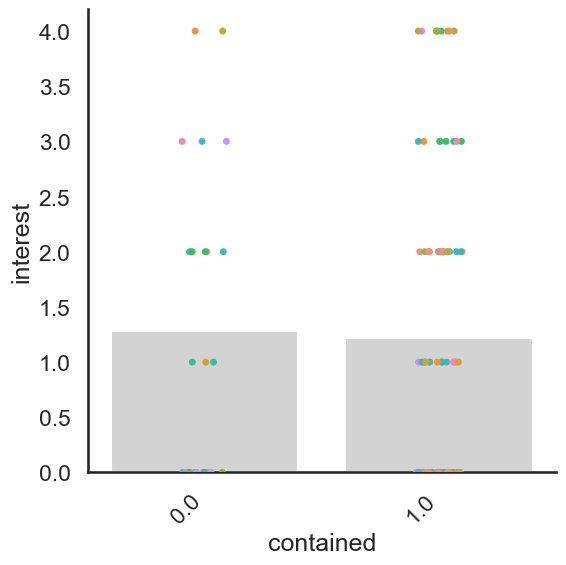

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: interest 
No. Observations: 113     Method:             REML     
No. Groups:       22      Scale:              0.9372   
Min. group size:  2       Log-Likelihood:     -176.8413
Max. group size:  6       Converged:          Yes      
Mean group size:  5.1                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.303    0.290  4.492 0.000  0.735  1.872
contained    -0.090    0.223 -0.402 0.688 -0.526  0.347
sub Var       0.977    0.414                           



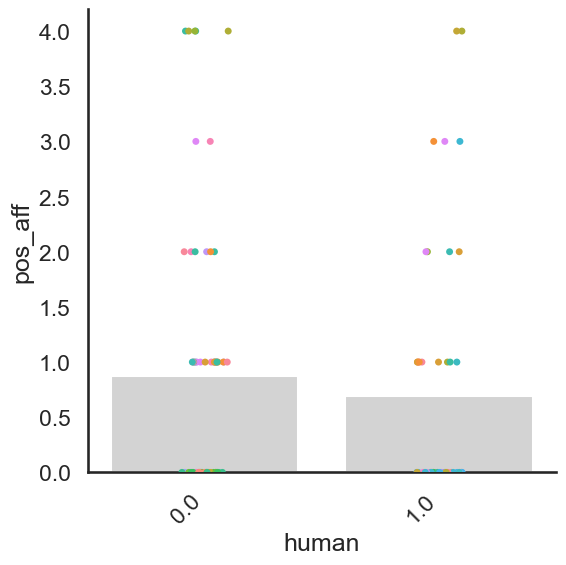

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pos_aff  
No. Observations: 113     Method:             REML     
No. Groups:       22      Scale:              0.8443   
Min. group size:  2       Log-Likelihood:     -167.3386
Max. group size:  6       Converged:          Yes      
Mean group size:  5.1                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.899    0.202  4.450 0.000  0.503  1.295
human        -0.189    0.191 -0.985 0.325 -0.564  0.187
sub Var       0.558    0.281                           



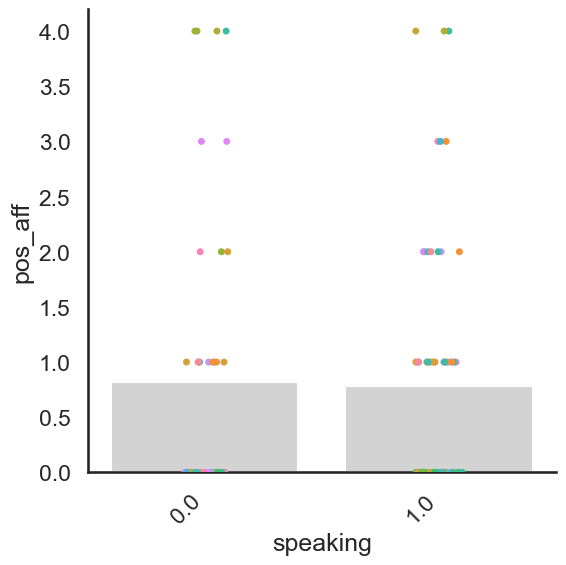

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pos_aff  
No. Observations: 113     Method:             REML     
No. Groups:       22      Scale:              0.8511   
Min. group size:  2       Log-Likelihood:     -167.8056
Max. group size:  6       Converged:          Yes      
Mean group size:  5.1                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  0.784     0.214  3.667  0.000   0.365   1.203
speaking   0.051     0.189  0.271  0.787  -0.319   0.421
sub Var    0.563     0.284                              



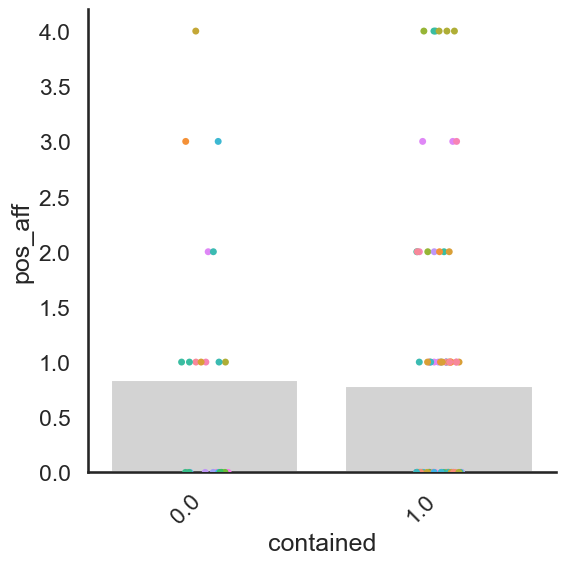

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pos_aff  
No. Observations: 113     Method:             REML     
No. Groups:       22      Scale:              0.8489   
Min. group size:  2       Log-Likelihood:     -167.5585
Max. group size:  6       Converged:          Yes      
Mean group size:  5.1                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.910    0.248  3.670 0.000  0.424  1.396
contained    -0.122    0.212 -0.574 0.566 -0.537  0.294
sub Var       0.562    0.283                           



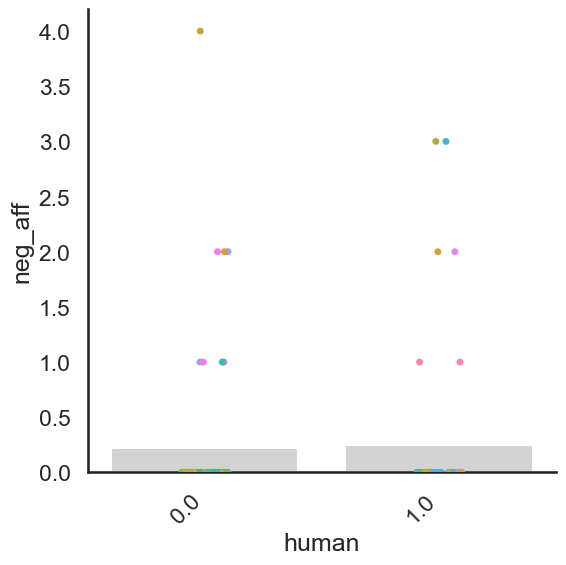

/usr/local/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: neg_aff  
No. Observations: 113     Method:             REML     
No. Groups:       22      Scale:              0.4865   
Min. group size:  2       Log-Likelihood:     -121.5359
Max. group size:  6       Converged:          Yes      
Mean group size:  5.1                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  0.219     0.088  2.489  0.013   0.046   0.391
human      0.026     0.133  0.196  0.845  -0.235   0.287
sub Var    0.000     0.050                              



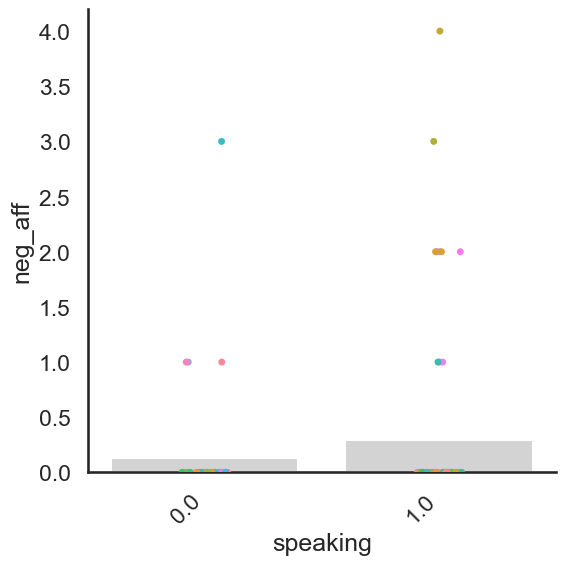

/usr/local/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: neg_aff  
No. Observations: 113     Method:             REML     
No. Groups:       22      Scale:              0.4712   
Min. group size:  2       Log-Likelihood:     -120.7835
Max. group size:  6       Converged:          Yes      
Mean group size:  5.1                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  0.129     0.106  1.214  0.225  -0.079   0.337
speaking   0.171     0.138  1.240  0.215  -0.099   0.441
sub Var    0.010     0.056                              



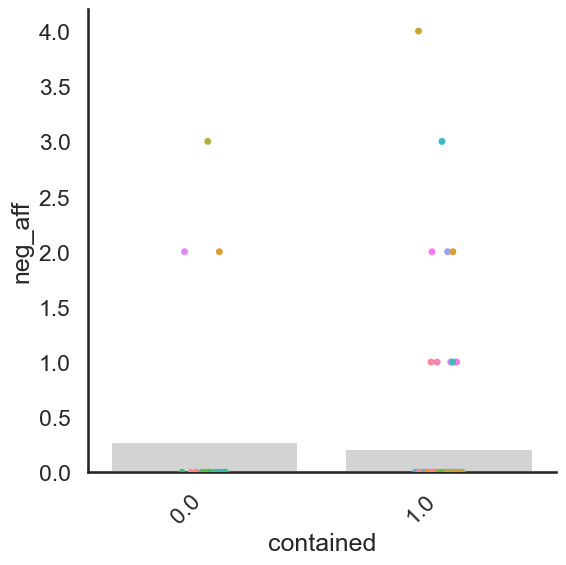

/usr/local/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: neg_aff  
No. Observations: 113     Method:             REML     
No. Groups:       22      Scale:              0.4859   
Min. group size:  2       Log-Likelihood:     -121.2959
Max. group size:  6       Converged:          Yes      
Mean group size:  5.1                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.280    0.141  1.981 0.048  0.003  0.557
contained    -0.064    0.160 -0.401 0.688 -0.377  0.249
sub Var       0.000    0.049                           



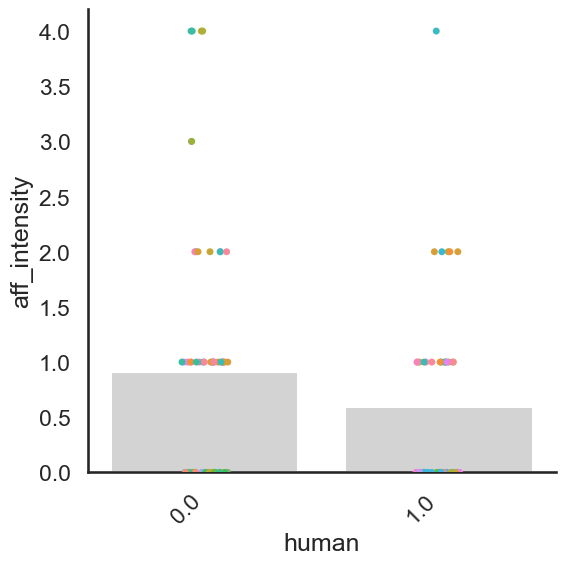

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: aff_intensity
No. Observations: 113     Method:             REML         
No. Groups:       22      Scale:              0.5830       
Min. group size:  2       Log-Likelihood:     -148.7030    
Max. group size:  6       Converged:          Yes          
Mean group size:  5.1                                      
------------------------------------------------------------
             Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept     0.983     0.182   5.404  0.000   0.626   1.339
human        -0.387     0.160  -2.412  0.016  -0.701  -0.073
sub Var       0.487     0.286                               



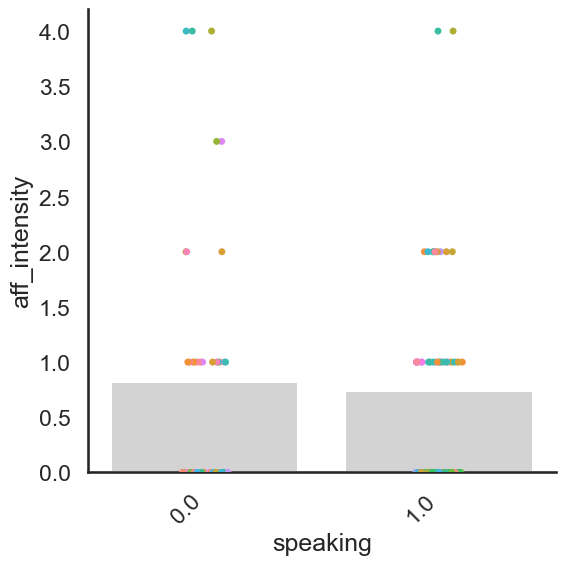

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: aff_intensity
No. Observations: 113     Method:             REML         
No. Groups:       22      Scale:              0.6255       
Min. group size:  2       Log-Likelihood:     -151.5196    
Max. group size:  6       Converged:          Yes          
Mean group size:  5.1                                      
------------------------------------------------------------
               Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept      0.794     0.189  4.209  0.000   0.424   1.164
speaking       0.021     0.163  0.128  0.898  -0.298   0.340
sub Var        0.457     0.265                              



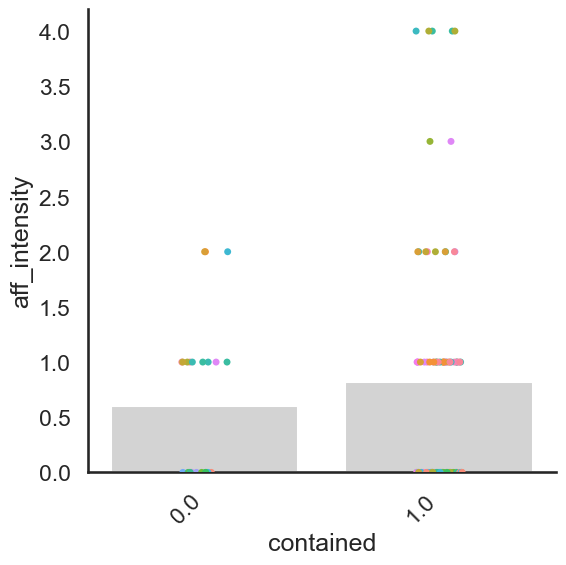

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: aff_intensity
No. Observations: 113     Method:             REML         
No. Groups:       22      Scale:              0.6236       
Min. group size:  2       Log-Likelihood:     -151.0584    
Max. group size:  6       Converged:          Yes          
Mean group size:  5.1                                      
------------------------------------------------------------
               Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept      0.686     0.216  3.171  0.002   0.262   1.110
contained      0.152     0.182  0.838  0.402  -0.204   0.509
sub Var        0.446     0.258                              



In [97]:
for v in ['interest', 'pos_aff', 'neg_aff','aff_intensity']:
    for f in ['human','speaking','contained']:

        plt.figure(figsize=(6,6))
        sns.barplot(y=v,x=f, data=data, color='lightgray', errwidth=0)
        sns.stripplot(y=v,x=f, data=data, hue='sub')
        plt.xticks(rotation=45, ha='right')
        sns.despine()
        plt.legend().remove()
        plt.tight_layout()
        plt.savefig(os.path.join(figs_dir, 'fullsample_feature_{0}_affect_{1}_plot.png'.format(f,v)), dpi=200)
        plt.show()
        plt.close()
        
        temp = data.dropna().copy()
        res = smf.mixedlm('{0} ~ {1}'.format(v,f), groups='sub', data=temp).fit()
        print(res.summary())